In [123]:
import pandas as pd
import numpy as np
import os  
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/Embeded_FS/EmbededFS-results.xlsx")
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['Embeded_FS', 'split']
列表名： ['LR', 'SVM', 'KNN', 'RF', 'NB', 'STACK', 'RFFI']


In [124]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [125]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'NB'
data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/Embeded_FS/EmbededFS-results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/Train-FS-ZSCORE-MI.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/InternalTest-FS-ZSCORE-MI.csv")
test1 = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/ExternalTest-FS-ZSCORE-MI.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
test1=test1[data.keys()]
test1.shape

train.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/Train-FS-ZSCORE-MI-NB.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/InternalTest-FS-ZSCORE-MI-NB.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
test1.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/ExternalTest-FS-ZSCORE-MI-NB.csv",index=None)



In [126]:
train.shape

(226, 24)

In [127]:
test.shape

(57, 24)

In [128]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [129]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [130]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
pathdata="C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/Train-FS-ZSCORE-MI-NB.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 24 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   PET_original_glcm_Imc1                                 226 non-null    float64
 1   CT_wavelet-HHH_glszm_SizeZoneNonUniformityNormalized   226 non-null    float64
 2   CT_original_shape_Flatness                             226 non-null    float64
 3   CT_original_shape_LeastAxisLength                      226 non-null    float64
 4   CT_original_glcm_Autocorrelation                       226 non-null    float64
 5   CT_wavelet-LHH_firstorder_Maximum                      226 non-null    float64
 6   CT_wavelet-HLL_firstorder_Maximum                      226 non-null    float64
 7   CT_wavelet-HLH_firstorder_10Percentile                 226 non-null    float64
 8   CT_wavelet-HHL_glszm_GrayLevelNonUniformityNormali

count   mean   std  \
PET_original_glcm_Imc1                             226.000  0.000 1.002   
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNorma... 226.000  0.000 1.002   
CT_original_shape_Flatness                         226.000  0.000 1.002   
CT_original_shape_LeastAxisLength                  226.000  0.000 1.002   
CT_original_glcm_Autocorrelation                   226.000  0.000 1.002   
CT_wavelet-LHH_firstorder_Maximum                  226.000 -0.000 1.002   
CT_wavelet-HLL_firstorder_Maximum                  226.000  0.000 1.002   
CT_wavelet-HLH_firstorder_10Percentile             226.000 -0.000 1.002   
CT_wavelet-HHL_glszm_GrayLevelNonUniformityNorm... 226.000 -0.000 1.002   
CT_wavelet-HHL_glszm_SmallAreaEmphasis             226.000 -0.000 1.002   
CT_wavelet-HHH_firstorder_Maximum                  226.000  0.000 1.002   
CT_wavelet-HHH_firstorder_Mean                     226.000 -0.000 1.002   
CT_wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis   226.000  0.000 1.002   
CT_wavelet-HHH_glszm_SmallAreaEmphasis             226.000 -0.000 1.002   
CT_wavelet2-HHH_glszm_SmallAreaEmphasis            226.000 -0.000 1.002   
CT_wavelet2-LLL_firstorder_10Percentile            226.000  0.000 1.002   
CT_lbp-3D-m1_firstorder_90Percentile               226.000  0.000 1.002   
CT_lbp-3D-k_glszm_SmallAreaEmphasis                226.000 -0.000 1.002   
PET_original_shape_Elongation                      226.000  0.000 1.002   
PET_original_shape_Flatness                        226.000 -0.000 1.002   
PET_original_firstorder_90Percentile               226.000  0.000 1.002   
CT_wavelet-HHL_firstorder_Skewness                 226.000 -0.000 1.002   
CT_wavelet-LHH_firstorder_Kurtosis                 226.000 -0.000 1.002   
label                                              226.000  0.389 0.489   

                                                      min    10%    25%  \
PET_original_glcm_Imc1                             -1.943 -1.174 -0.824   
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNorma... -1.825 -1.129 -0.871   
CT_original_shape_Flatness                         -1.587 -1.188 -0.817   
CT_original_shape_LeastAxisLength                  -0.957 -0.743 -0.704   
CT_original_glcm_Autocorrelation                   -2.074 -1.249 -0.801   
CT_wavelet-LHH_firstorder_Maximum                  -1.684 -1.138 -0.693   
CT_wavelet-HLL_firstorder_Maximum                  -1.638 -1.139 -0.697   
CT_wavelet-HLH_firstorder_10Percentile             -4.323 -1.248 -0.436   
CT_wavelet-HHL_glszm_GrayLevelNonUniformityNorm... -2.570 -1.212 -0.599   
CT_wavelet-HHL_glszm_SmallAreaEmphasis             -4.315 -0.969 -0.338   
CT_wavelet-HHH_firstorder_Maximum                  -1.590 -1.023 -0.615   
CT_wavelet-HHH_firstorder_Mean                     -3.938 -0.876 -0.302   
CT_wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis   -2.909 -1.036 -0.427   
CT_wavelet-HHH_glszm_SmallAreaEmphasis             -1.723 -1.706 -0.564   
CT_wavelet2-HHH_glszm_SmallAreaEmphasis            -1.789 -1.708 -0.579   
CT_wavelet2-LLL_firstorder_10Percentile            -1.530 -0.851 -0.596   
CT_lbp-3D-m1_firstorder_90Percentile               -2.131 -1.441 -0.750   
CT_lbp-3D-k_glszm_SmallAreaEmphasis                -2.739 -1.314 -0.372   
PET_original_shape_Elongation                      -4.501 -1.144 -0.556   
PET_original_shape_Flatness                        -3.128 -1.349 -0.601   
PET_original_firstorder_90Percentile               -1.306 -1.046 -0.726   
CT_wavelet-HHL_firstorder_Skewness                 -6.435 -0.626 -0.255   
CT_wavelet-LHH_firstorder_Kurtosis                 -1.425 -0.867 -0.680   
label                                               0.000  0.000  0.000   

                                                      50%   75%   90%   95%  \
PET_original_glcm_Imc1                             -0.118 0.736 1.562 1.818   
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNorma...  0.121 0.494 1.610 1.610   
CT_original_shape_Flatness                         -0.129 0.551 

In [131]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


PET_original_glcm_Imc1                                   0
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNormalized     0
CT_wavelet-LHH_firstorder_Kurtosis                       0
CT_wavelet-HHL_firstorder_Skewness                       0
PET_original_firstorder_90Percentile                     0
PET_original_shape_Flatness                              0
PET_original_shape_Elongation                            0
CT_lbp-3D-k_glszm_SmallAreaEmphasis                      0
CT_lbp-3D-m1_firstorder_90Percentile                     0
CT_wavelet2-LLL_firstorder_10Percentile                  0
CT_wavelet2-HHH_glszm_SmallAreaEmphasis                  0
CT_wavelet-HHH_glszm_SmallAreaEmphasis                   0
CT_wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis         0
CT_wavelet-HHH_firstorder_Mean                           0
CT_wavelet-HHH_firstorder_Maximum                        0
CT_wavelet-HHL_glszm_SmallAreaEmphasis                   0
CT_wavelet-HHL_glszm_GrayLevelNonUniformityNormalized   

In [132]:

# pathdata="C:/Users/zuoya/Desktop/EJR/2023-383CASES-01-CLINICS.csv"
# diabetes_preprocessed = pd.read_csv(pathdata)




# # diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
# df = diabetes_preprocessed.copy()

In [133]:
X_train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/Train-FS-ZSCORE-MI-NB.csv")
y_train = X_train['label']
X_train = X_train.drop(labels=['label'], axis=1)

X_test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/InternalTest-FS-ZSCORE-MI-NB.csv")
y_test = X_test['label']
X_test = X_test.drop(labels=['label'], axis=1)

In [134]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [135]:
# X_train.to_csv("C:/Users/zuoya/Desktop/EJR/xtrain-2023-383CASES-01-CLINICS.csv")

In [136]:
# X_test.to_csv("C:/Users/zuoya/Desktop/EJR/xtest-2023-383CASES-01-CLINICS.csv")

In [137]:
# y_train.to_csv("C:/Users/zuoya/Desktop/EJR/ytrain-2023-383CASES-01-CLINICS.csv")

In [138]:
# y_test.to_csv("C:/Users/zuoya/Desktop/EJR/ytest-2023-383CASES-01-CLINICS.csv")

In [139]:
# Evaluate each model in turn by looking at train and test errors and scores
from sklearn.metrics import roc_auc_score
def evaluate_classification_model_holdout(models):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

    # Define lists to track names and results for models
    names = []
    train_accuracy_results = []
    test_accuracy_results = []

    print('################ Accuracy scores for test set for the models: ################\n')
    for name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

#         train_accuracy_result = accuracy_score(y_train, y_train_pred)
#         test_accuracy_result = accuracy_score(y_test, y_test_pred)
#         train_accuracy_results.append(train_accuracy_result)
#         test_accuracy_results.append(test_accuracy_result)
        train_accuracy_result = roc_auc_score(y_train, y_train_pred)
        test_accuracy_result = roc_auc_score(y_test, y_test_pred)
        train_accuracy_results.append(train_accuracy_result)
        test_accuracy_results.append(test_accuracy_result)

        names.append(name)
        msg = "%s: %f" % (name, test_accuracy_result)
        print(msg)

    print('\n################ Train and test results for the model: ################\n')
    data_result = pd.DataFrame({'models': names,
                                'accuracy_train': train_accuracy_results,
                                'accuracy_test': test_accuracy_results})
    print(data_result)

    # Plot the results
    plt.figure(figsize=(15, 12))
    sns.barplot(x='accuracy_test', y='models', data=data_result.sort_values(by="accuracy_test", ascending=False), color="r")
    plt.xlabel('AUC Scores')
    plt.ylabel('Models')
    plt.title('AUC Scores For Test Set')
    plt.show()

In [140]:
# Define a function to plot feature_importances
def plot_feature_importances(tuned_model):
    feature_importances = pd.DataFrame({'Importance': tuned_model.feature_importances_ * 100, 'Feature': X_train.columns})
    plt.figure()
    sns.barplot(x="Importance", y="Feature", data=feature_importances.sort_values(by="Importance", ascending=False))
    plt.title('Feature Importance') # TODO tuned_model.__name__
    plt.show()


In [141]:
# Function to plot confusion_matrix
def plot_confusion_matrix(model, X_test, y_test, normalize=True):
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
    plt.figure(figsize=(15, 15))
    plt.show()

In [142]:
# Function to plot confusion_matrix
def plot_confusion_matrix_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    model_cm = ConfusionMatrix(model, percent=True, classes=["EGFR Wild", "EGFR Mutated"], cmap='Blues')
    model_cm.fit(X_train, y_train)
    model_cm.score(X_test, y_test)
    model_cm.show();

In [143]:
# Function to plot classification_report by using yellowbrick
def plot_classification_report_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ClassificationReport(model, classes=["EGFR Wild", "EGFR Mutated"], support=True, cmap='Blues')
    visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof()
    # visualizer.show();

In [144]:
# Funtion to plot ROC-AUC Curve
def plot_roc_auc_curve(model):
    model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.4f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model,' Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [145]:
# Funtion to plot ROC-AUC Curve by using yellowbrick
def plot_roc_auc_curve_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ROCAUC(model, classes=["EGFR Wild", "EGFR Mutated"])
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show();  # Finalize and show the figure

In [146]:
# Function to plot prediction errors
def plot_class_prediction_error_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    # Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(model, classes=["EGFR Wild", "EGFR Mutated"], cmap='Blues')
    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)
    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)
    # Draw visualization
    visualizer.show();

In [147]:
# Function to plot learning curves
def plot_learning_curve(model_tuned):
    # Create the learning curve visualizer
    cv = StratifiedKFold(n_splits=12)
    sizes = np.linspace(0.3, 1.0, 10)
    # Instantiate the classification model and visualizer
    visualizer = LearningCurve(model_tuned, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4)
    visualizer.fit(X, y)  # Fit the data to the visualizer
    visualizer.show()  # Finalize and render the figure

In [148]:
# Function to report results quickly
def report_results_quickly(model):
    fig, axes = plt.subplots(2, 2,figsize=(15, 9))
    model = model
    visualgrid = [FeatureImportances(model, ax=axes[0][0]),
                  ConfusionMatrix(model, ax=axes[0][1], cmap='Blues'),
                  ClassificationReport(model, ax=axes[1][0], cmap='Blues'),
                  ROCAUC(model, ax=axes[1][1])]
    for viz in visualgrid:
        viz.fit(X_train, y_train)
        viz.score(X_test, y_test)
        viz.finalize()
    plt.show()

In [149]:
# Function to plot all the results
def plot_results(model):
    plot_confusion_matrix_yb(model)
    plot_classification_report_yb(model)
    plot_roc_auc_curve_yb(model)
    plot_class_prediction_error_yb(model)


In [150]:
def Save_to_Csv(data, file_name, Save_format = 'csv', Save_type = 'col'):
    # data
    # 输入为一个字典，格式： { '列名称': 数据,....} 
    # 列名即为CSV中数据对应的列名， 数据为一个列表
    
    # file_name 存储文件的名字
    # Save_format 为存储类型， 默认csv格式， 可改为 excel
    # Save_type 存储类型 默认按列存储， 否则按行存储
    
    # 默认存储在当前路径下
    
    import pandas as pd
    import numpy as np
    
    Name = []
    times = 0
 
    if Save_type == 'col':
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List).reshape(-1,1)
            else:
                Data = np.hstack((Data, np.array(List).reshape(-1,1)))
                
            times += 1
            
        Pd_data = pd.DataFrame(columns=Name, data=Data) 
        
    else:
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List)
            else:
                Data = np.vstack((Data, np.array(List)))
        
            times += 1
    
        Pd_data = pd.DataFrame(index=Name, data=Data)  
    
    if Save_format == 'csv':
        Pd_data.to_csv('./'+ file_name +'.csv',encoding='utf-8')
    else:
        Pd_data.to_excel('./'+ file_name +'.xls',encoding='utf-8')

In [151]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [152]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.566288
Naive Bayes: 0.625000
KNN: 0.541667
SVM: 0.481061
ANN: 0.577652
CART: 0.568182
BaggedTrees: 0.554924
RF: 0.579545
AdaBoost: 0.638258
GBM: 0.621212
XGBoost: 0.482955
LightGBM: 0.543561
CatBoost: 0.526515
NGBoost: 0.543561

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.627          0.566
1          Naive Bayes           0.600          0.625
2                  KNN           0.638          0.542
3                  SVM           0.697          0.481
4                  ANN           0.894          0.578
5                 CART           1.000          0.568
6          BaggedTrees           0.993          0.555
7                   RF           1.000          0.580
8             AdaBoost           0.957          0.638
9                  GBM           1.000          0.621
10

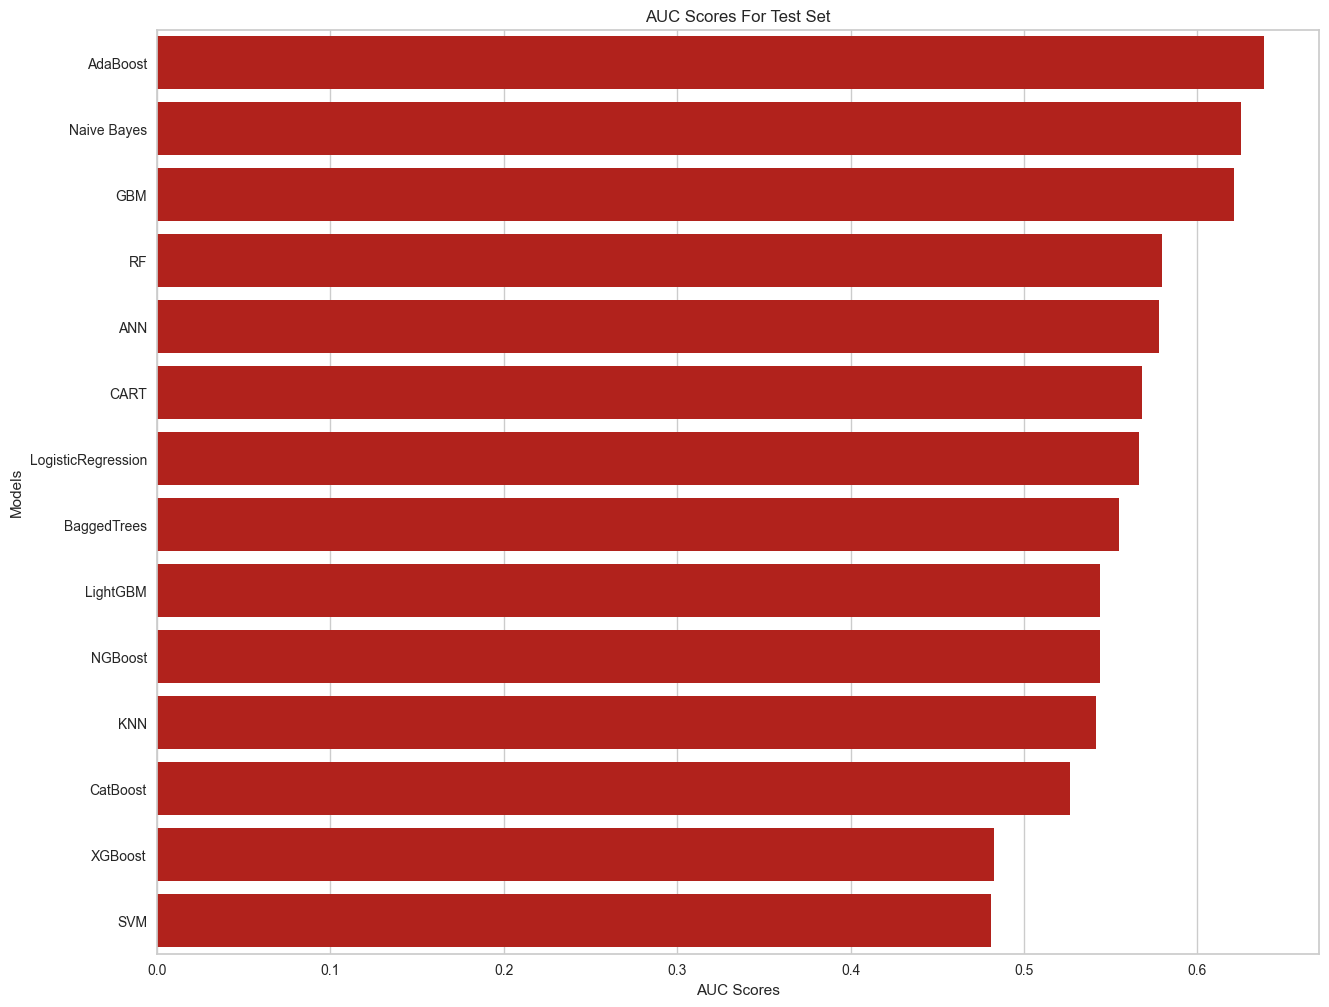

In [153]:
evaluate_classification_model_holdout(base_models)

In [32]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

################ Accuracy scores for test set for the models: ################

GaussianNB: 0.583333

################ Train and test results for the model: ################

       models  accuracy_train  accuracy_test
0  GaussianNB           0.620          0.583


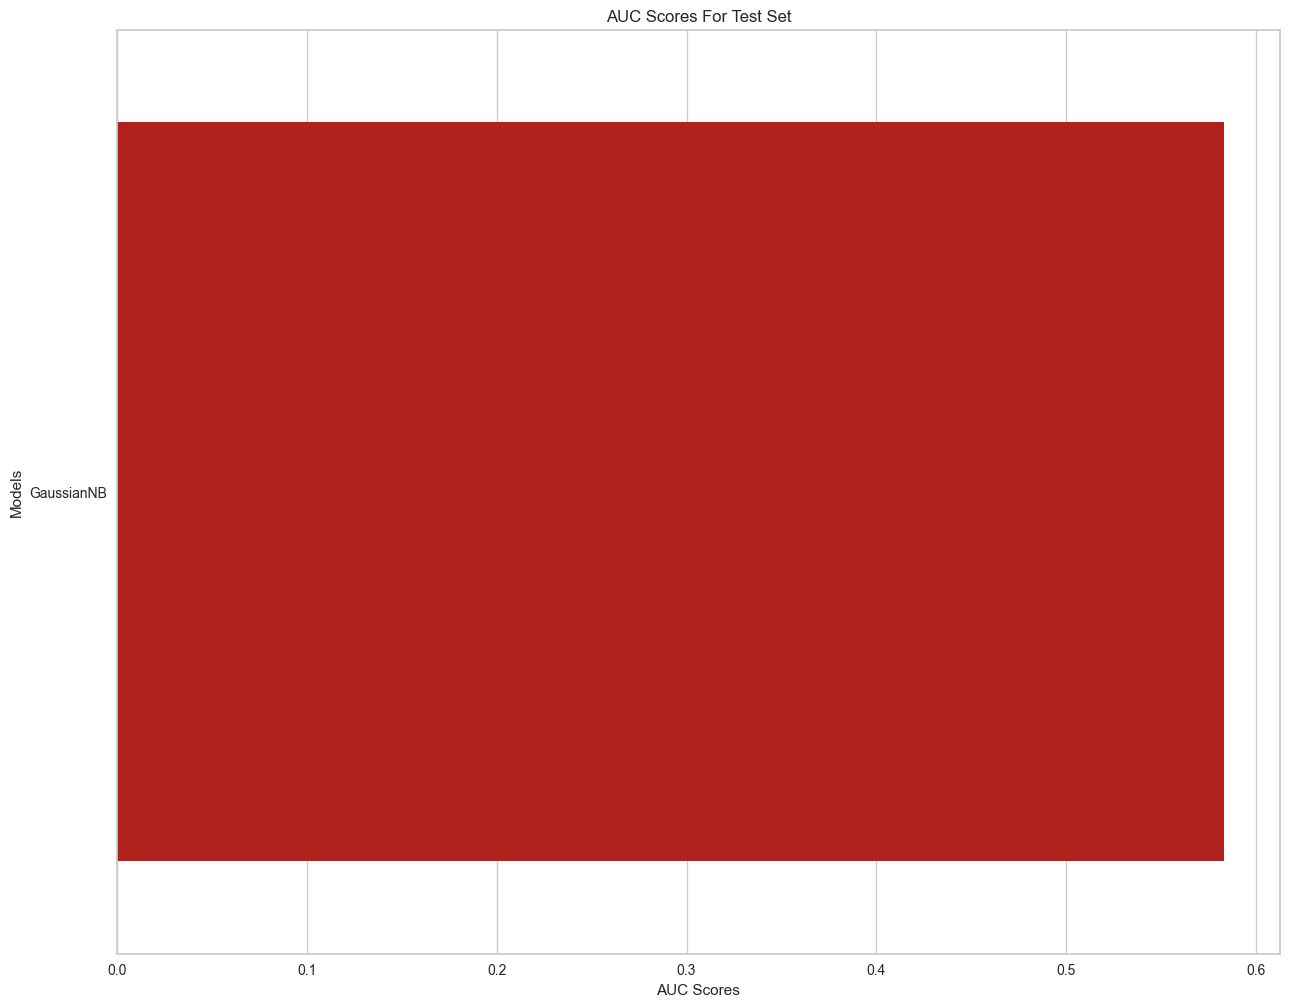

In [28]:
# LogisticRegression with make_pipeline
GNBreg = make_pipeline(MinMaxScaler(), GaussianNB())
evaluate_classification_model_holdout([('GaussianNB', GNBreg)]) # 0.805 instead of  0.805195

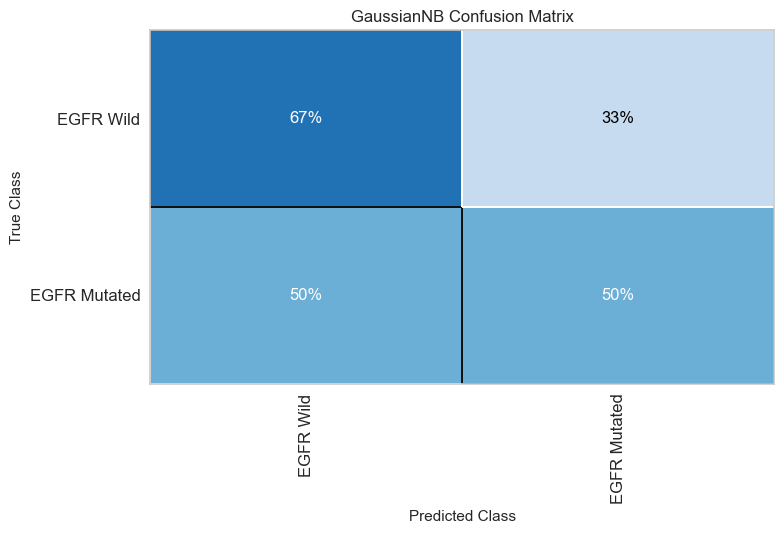

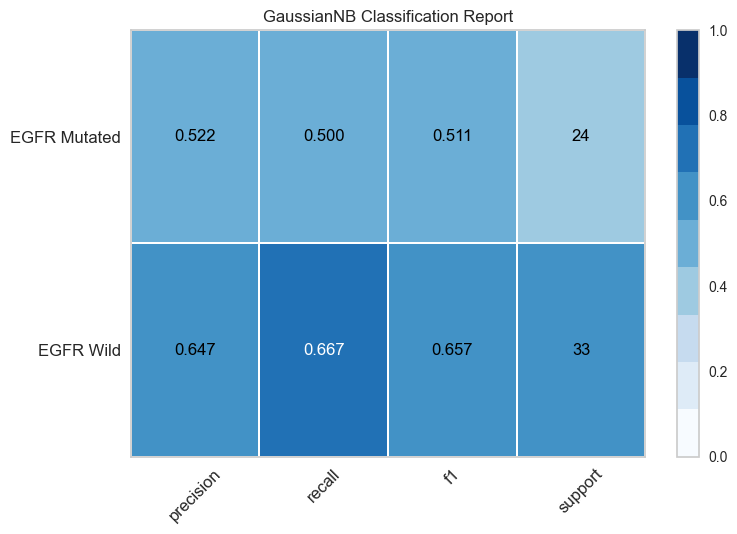

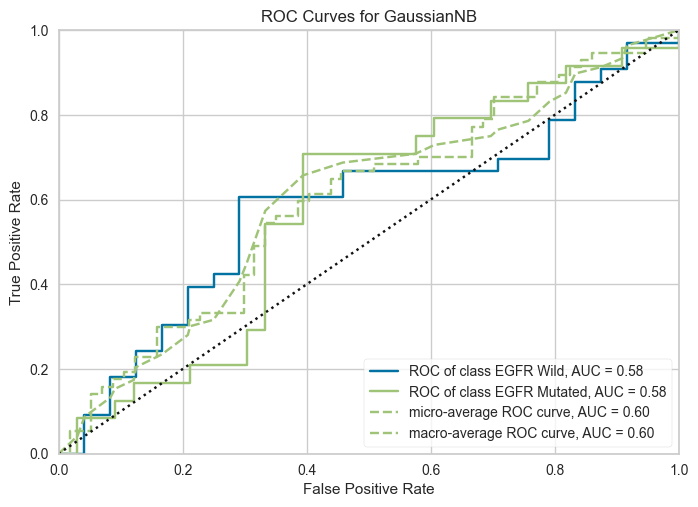

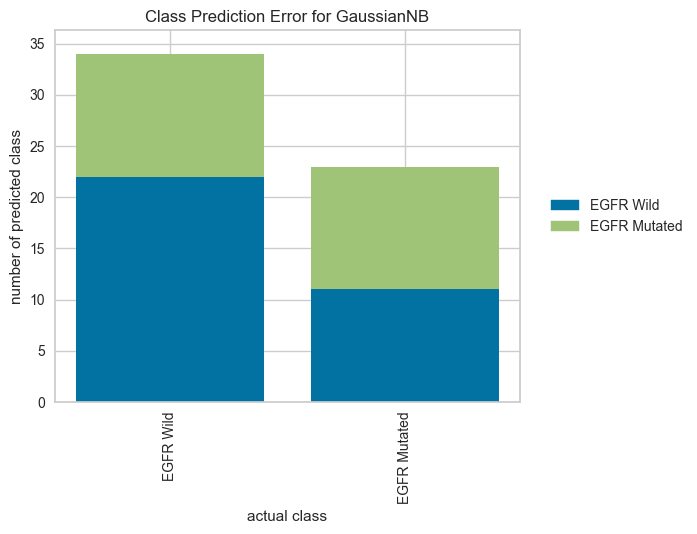

NameError: name 'X' is not defined

In [29]:
# plot_feature_importances(GNBreg)
plot_results(GNBreg)
# report_results_quickly(GNBreg)
plot_learning_curve(GNBreg)

################ Accuracy scores for test set for the models: ################

KNN: 0.585227

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    KNN           0.696          0.585


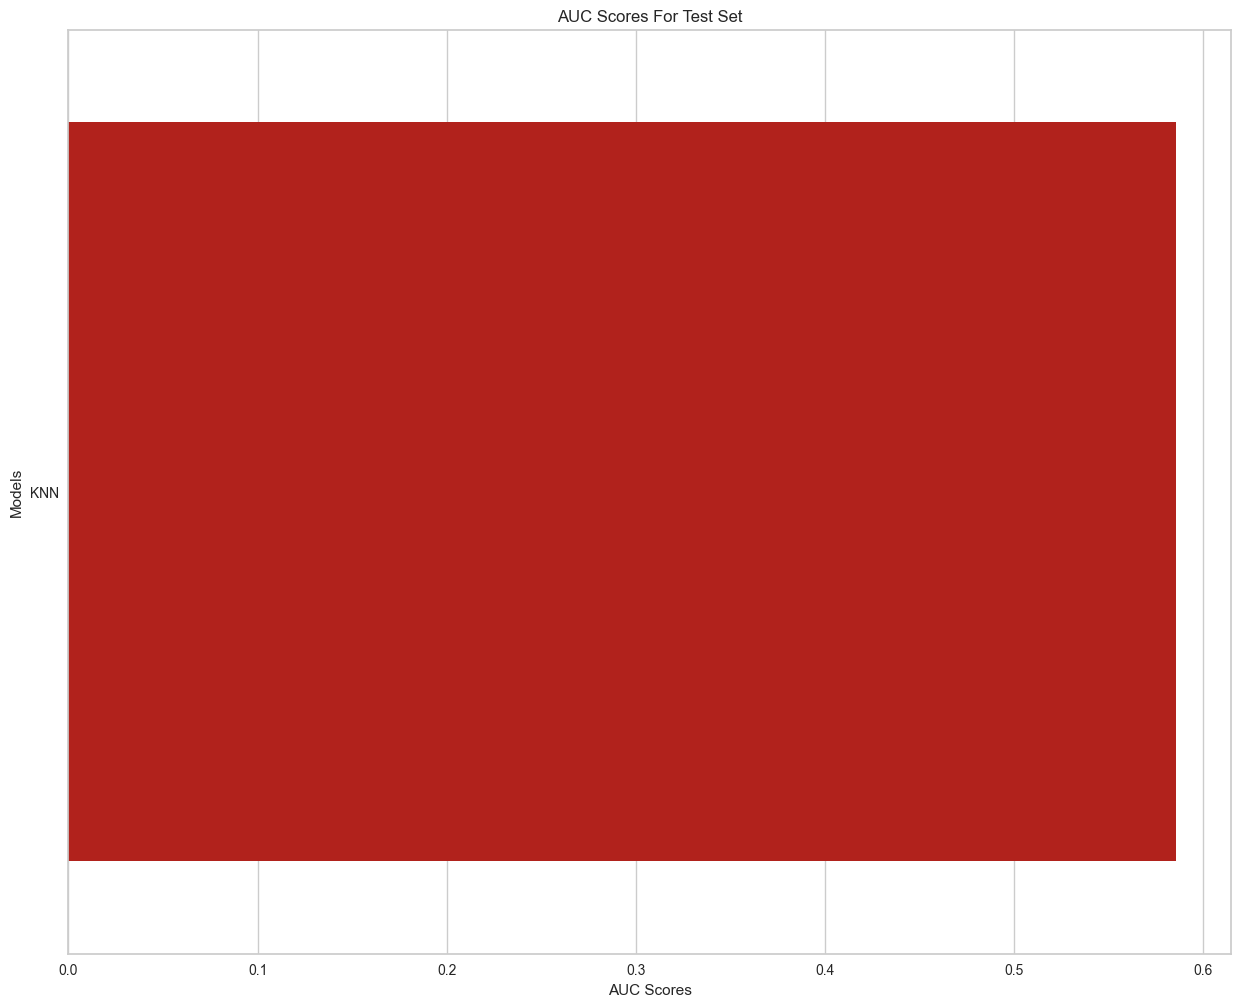

In [30]:
# LogisticRegression with make_pipeline
KNNreg = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', KNNreg)]) # 0.805 instead of  0.805195

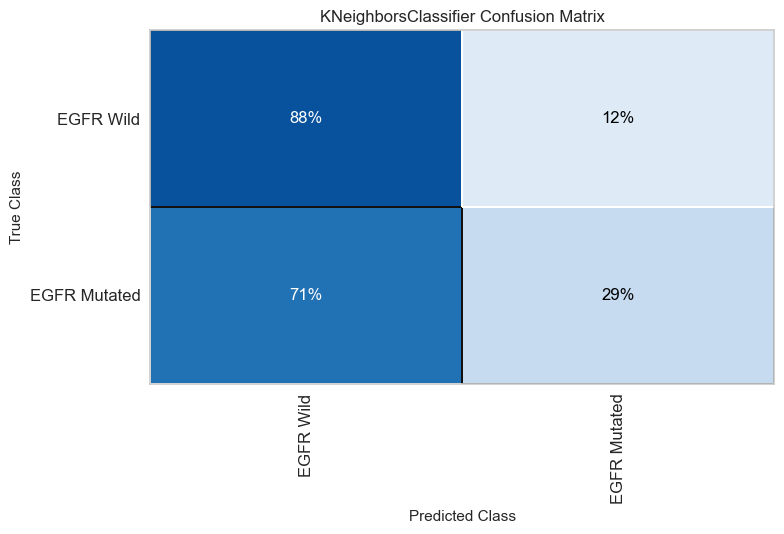

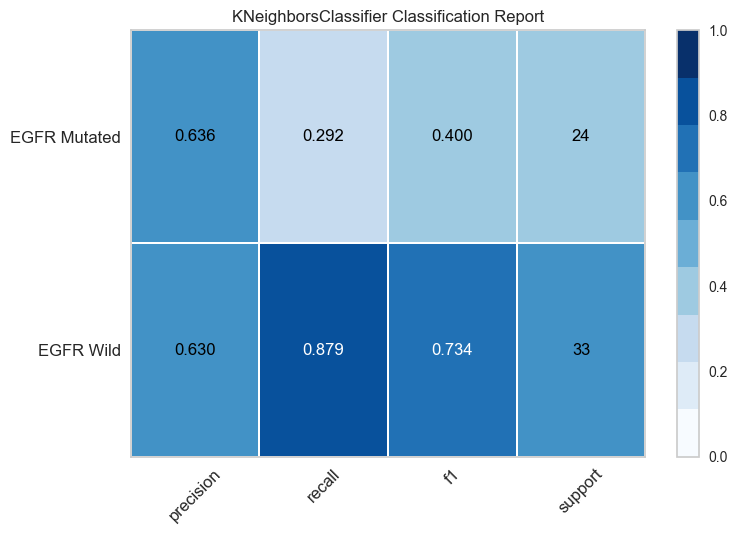

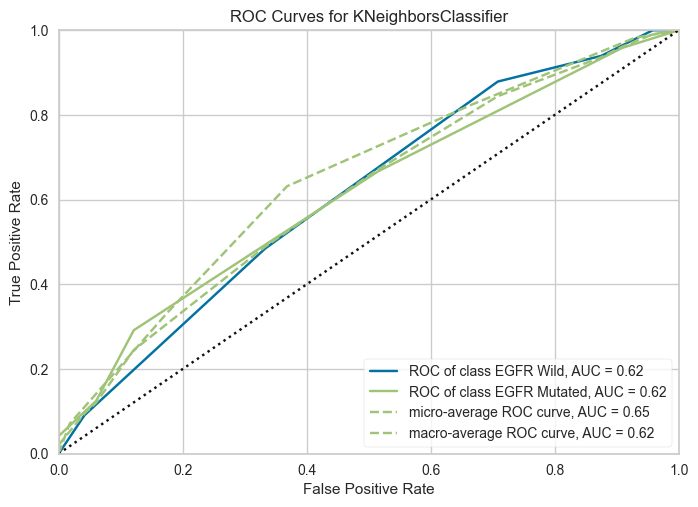

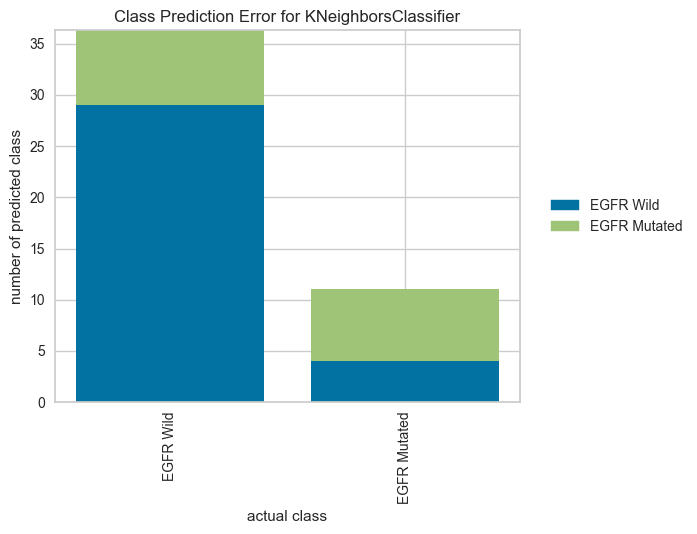

NameError: name 'X' is not defined

In [31]:
# plot_feature_importances(KNNreg)
plot_results(KNNreg)
# report_results_quickly(KNNreg)
plot_learning_curve(KNNreg)

In [ ]:
# LogisticRegression with make_pipeline
MLPreg = make_pipeline(MinMaxScaler(), MLPClassifier())
evaluate_classification_model_holdout([('MLP', MLPreg)]) # 0.805 instead of  0.805195

In [32]:
# plot_feature_importances(MLPreg)
plot_results(MLPreg)
# report_results_quickly(MLPreg)
plot_learning_curve(MLPreg)

NameError: name 'MLPreg' is not defined

################ Accuracy scores for test set for the models: ################

DT: 0.490530

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     DT           1.000          0.491


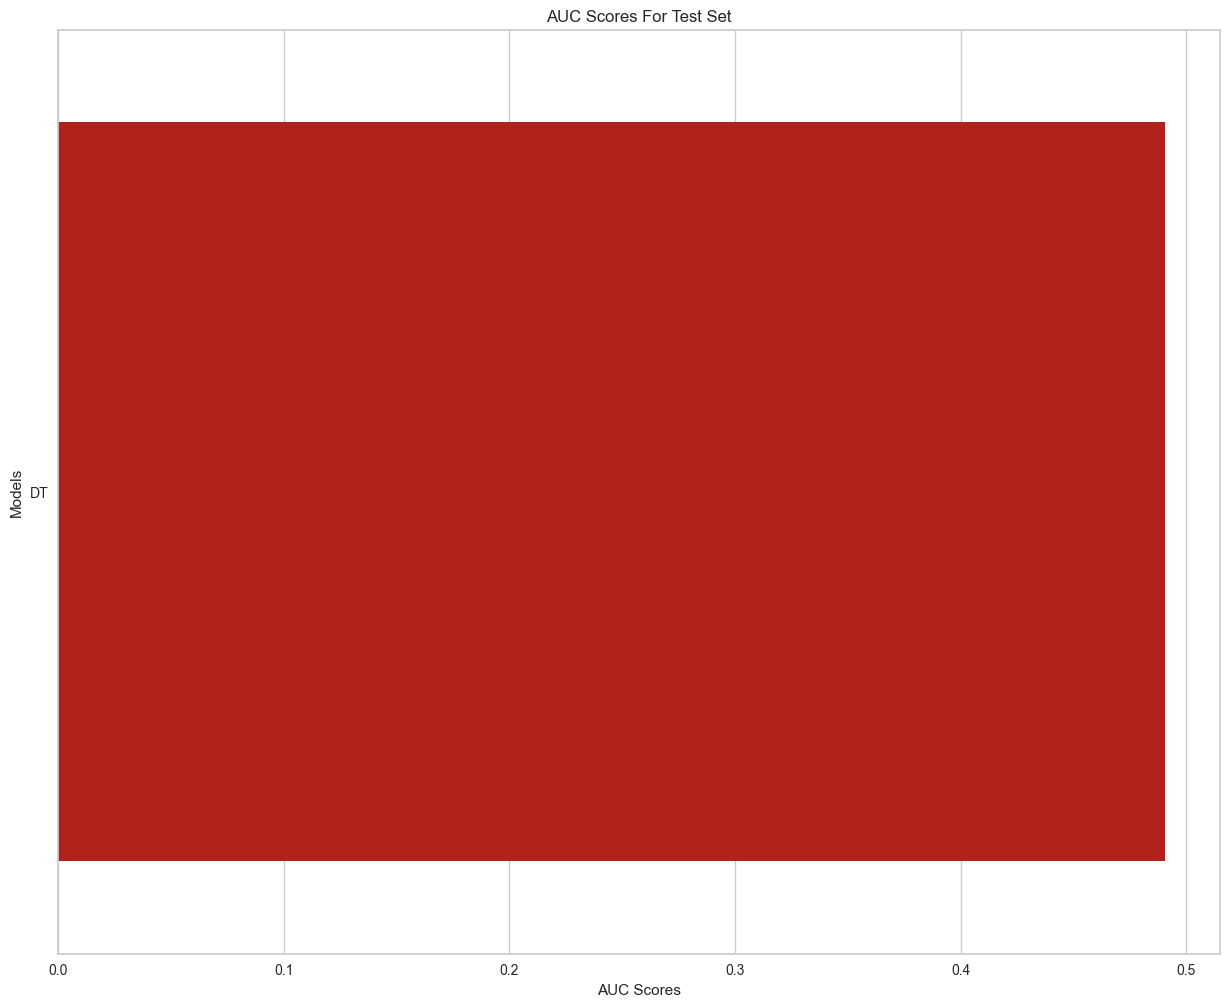

In [33]:
# LogisticRegression with make_pipeline
DTreg = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
evaluate_classification_model_holdout([('DT', DTreg)]) # 0.805 instead of  0.805195

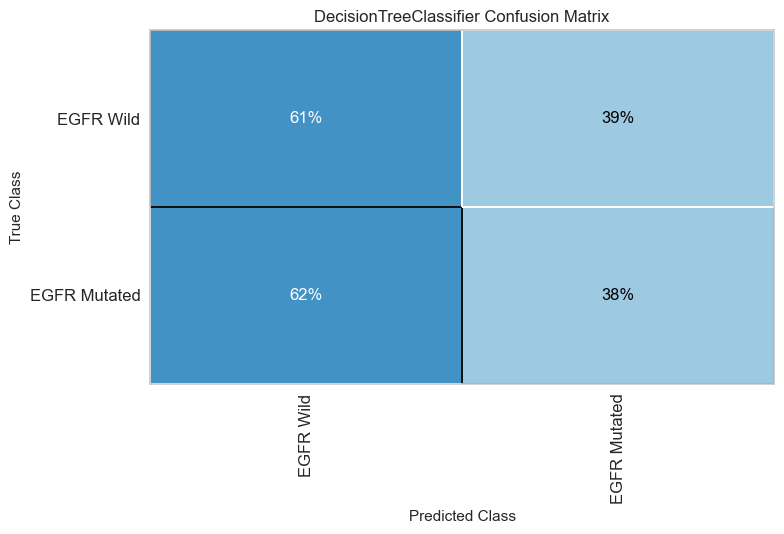

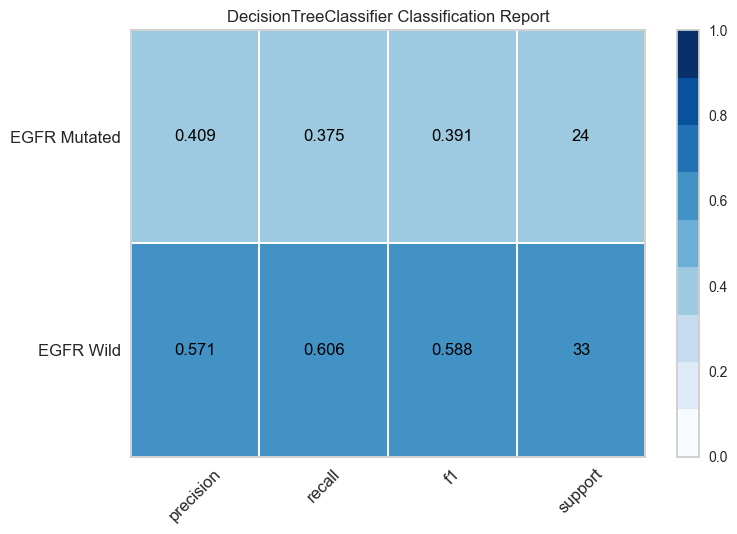

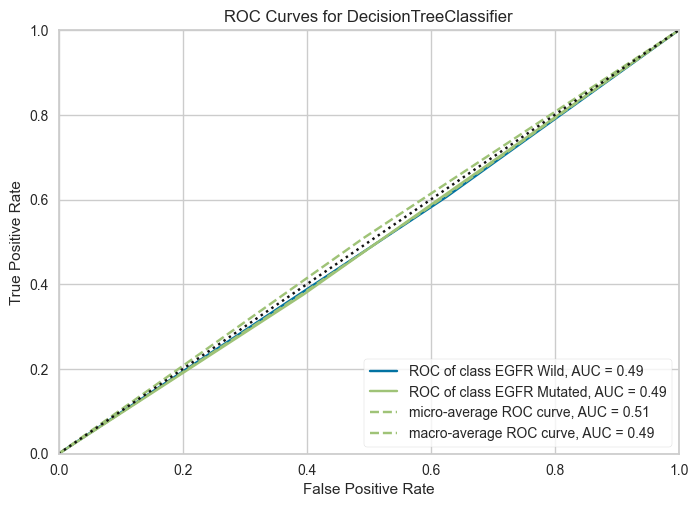

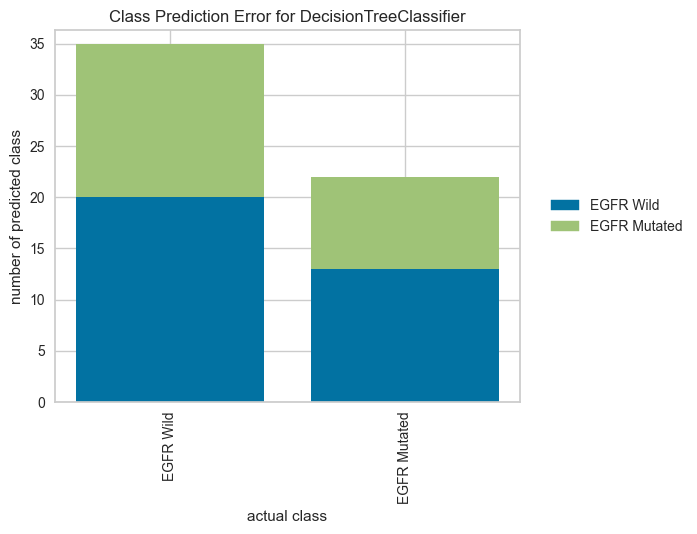

NameError: name 'X' is not defined

In [34]:
# plot_feature_importances(DTreg)
plot_results(DTreg)
# report_results_quickly(DTreg)
plot_learning_curve(DTreg)

################ Accuracy scores for test set for the models: ################

BC: 0.507576

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     BC           0.976          0.508


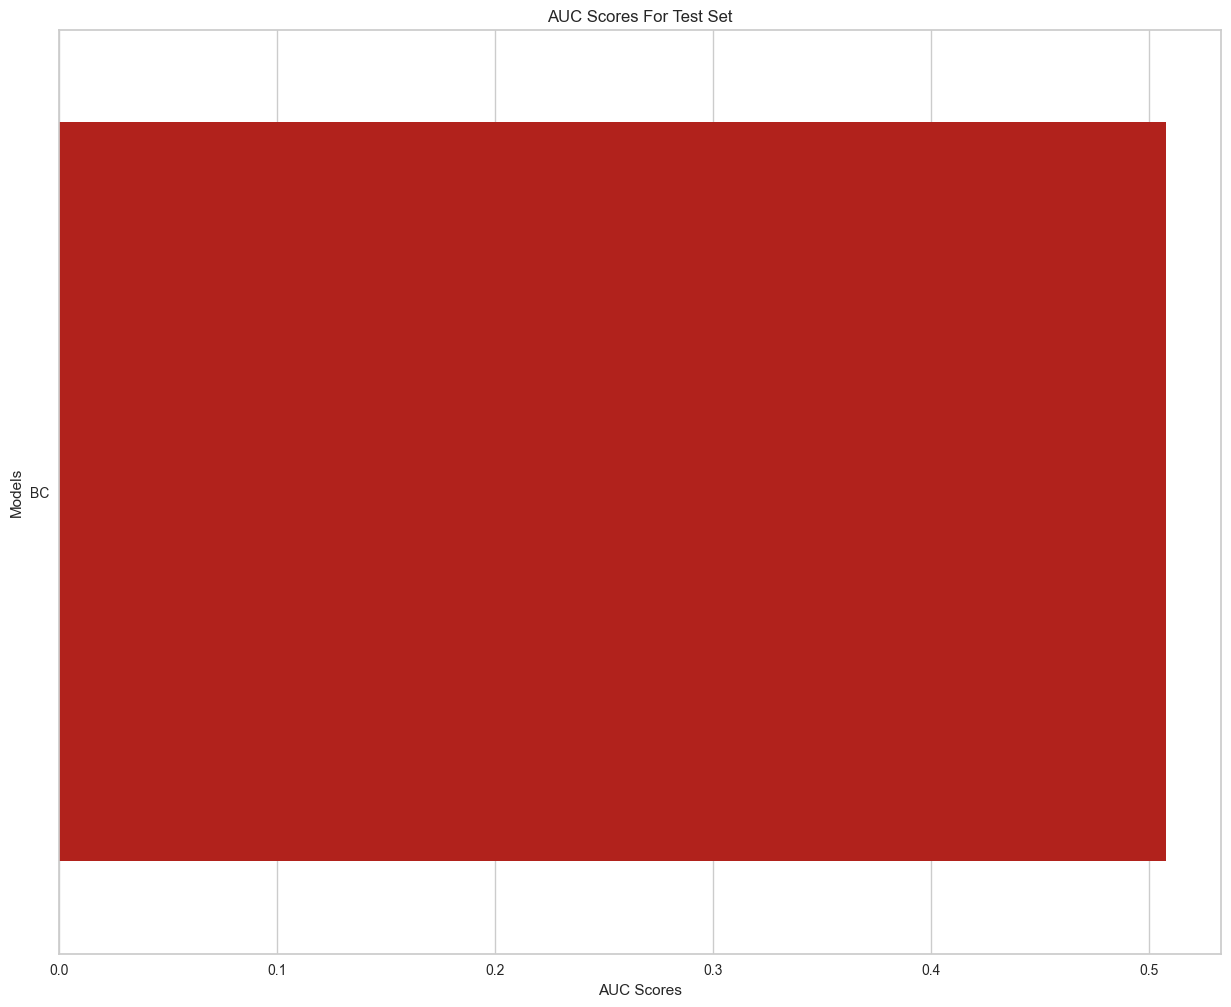

In [35]:
# LogisticRegression with make_pipeline
BCreg = make_pipeline(MinMaxScaler(), BaggingClassifier())
evaluate_classification_model_holdout([('BC', BCreg)]) # 0.805 instead of  0.805195

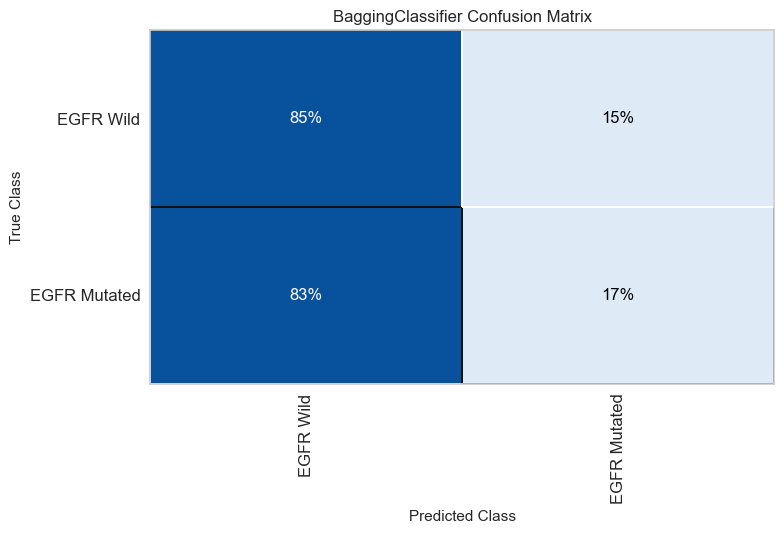

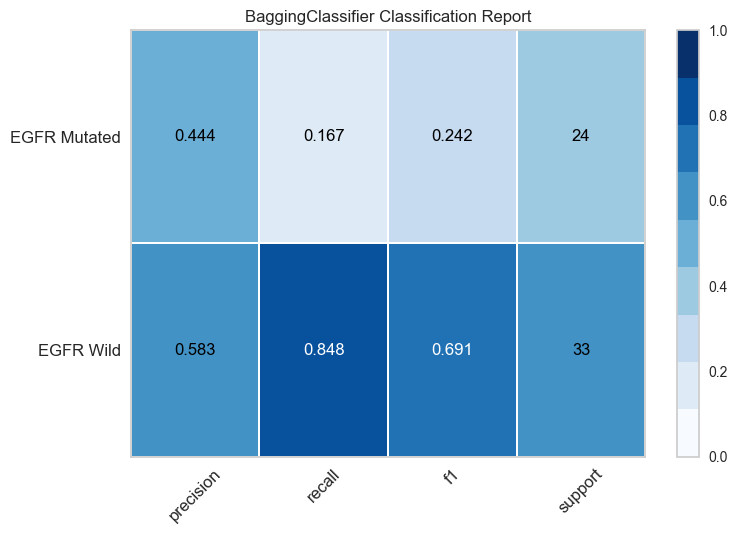

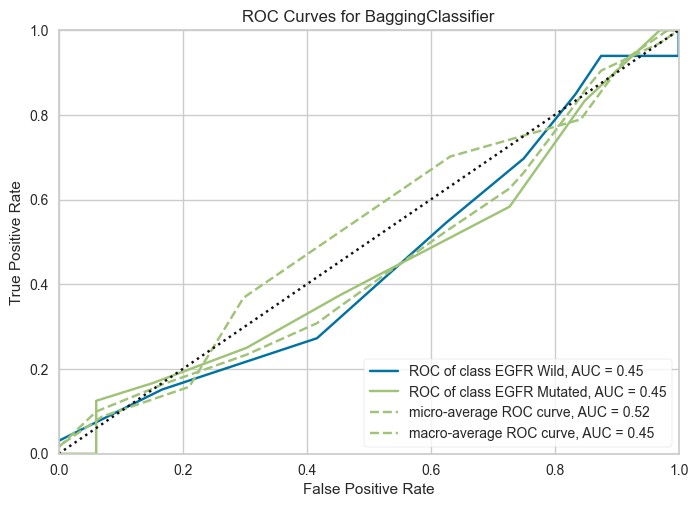

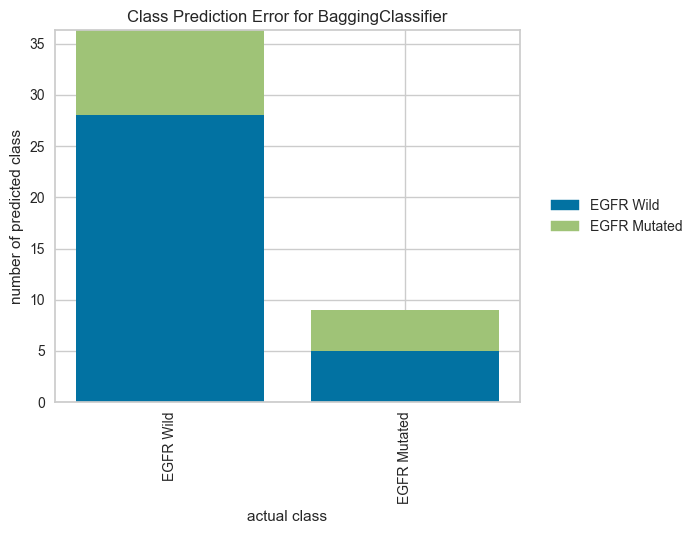

NameError: name 'X' is not defined

In [36]:
# plot_feature_importances(BCreg)
plot_results(BCreg)
# report_results_quickly(BCreg)
plot_learning_curve(BCreg)

################ Accuracy scores for test set for the models: ################

GBM: 0.482955

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    GBM           1.000          0.483


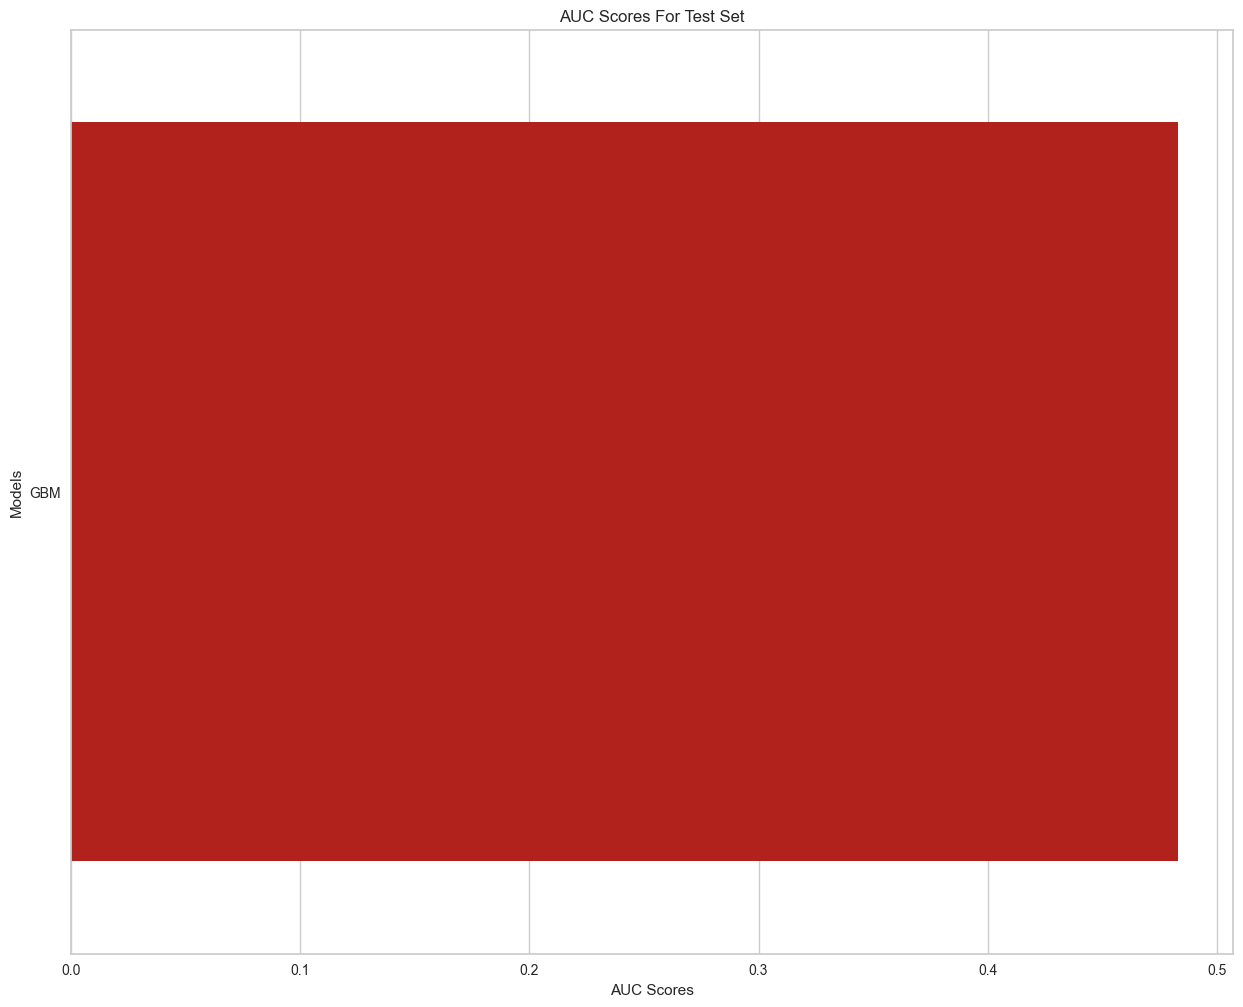

In [37]:
# LogisticRegression with make_pipeline
GBMreg = make_pipeline(MinMaxScaler(), GradientBoostingClassifier())
evaluate_classification_model_holdout([('GBM', GBMreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(GBMreg)
plot_results(GBMreg)
# report_results_quickly(GBMreg)
plot_learning_curve(GBMreg)

In [ ]:
# LogisticRegression with make_pipeline
ABreg = make_pipeline(MinMaxScaler(), AdaBoostClassifier())
evaluate_classification_model_holdout([('AB', ABreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(ABreg)
plot_results(ABreg)
# report_results_quickly(ABreg)
plot_learning_curve(ABreg)

In [ ]:
# LogisticRegression with make_pipeline
ngbreg = make_pipeline(MinMaxScaler(), NGBClassifier(verbose=False))
evaluate_classification_model_holdout([('NGBClassifier', ngbreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(ngbreg)
# plot_results(ngbreg)
# report_results_quickly(ngbreg)
# plot_learning_curve(ngbreg)

In [ ]:
# KNN with make_pipeline
knn = make_pipeline(RobustScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', knn)]) # 0.857 instead of 0.850649

In [ ]:
# plot_feature_importances(knn)
plot_results(knn)
# report_results_quickly(knn)
plot_learning_curve(knn)

In [ ]:
# SVC with make_pipeline
svc = make_pipeline(RobustScaler(), SVC())
evaluate_classification_model_holdout([('SVM', svc)]) # 0.864 instead of 0.837662

In [ ]:
# plot_feature_importances(svc)
plot_results(svc)
# report_results_quickly(svc)
plot_learning_curve(svc)

In [ ]:
# ANN with make_pipeline
ann = make_pipeline(StandardScaler(), MLPClassifier())
evaluate_classification_model_holdout([('ANN', ann)]) # 0.857 instead of 0.850649

In [33]:
# MODEL TUNING

'''
Models to be tuned:
    - LogisticRegression
    - RandomForestClassifier
    -SVM
    - LightGBMClassifier
    - XGBClassifier
'''

# LogisticRegression # 0.805195

logreg_model = LogisticRegression(random_state=42)
logreg_params = {'penalty': ['l1', 'l2'],
                 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]}
logreg_cv_model = GridSearchCV(logreg_model, logreg_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
logreg_cv_model.best_params_ # {'C': 1, 'penalty': 'l2'}

Fitting 10 folds for each of 16 candidates, totalling 160 fits


C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    %

{'C': 0.001, 'penalty': 'l2'}

In [34]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.5

In [35]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-LR-NB', Save_format = 'csv',Save_type = 'col')

In [36]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-LR-NB.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.58      1.00      0.73        33
EGFR Mutated       0.00      0.00      0.00        24

    accuracy                           0.58        57
   macro avg       0.29      0.50      0.37        57
weighted avg       0.34      0.58      0.42        57

precision 0.0 accuracy 0.5789473684210527 recall 0.0 auc 0.5


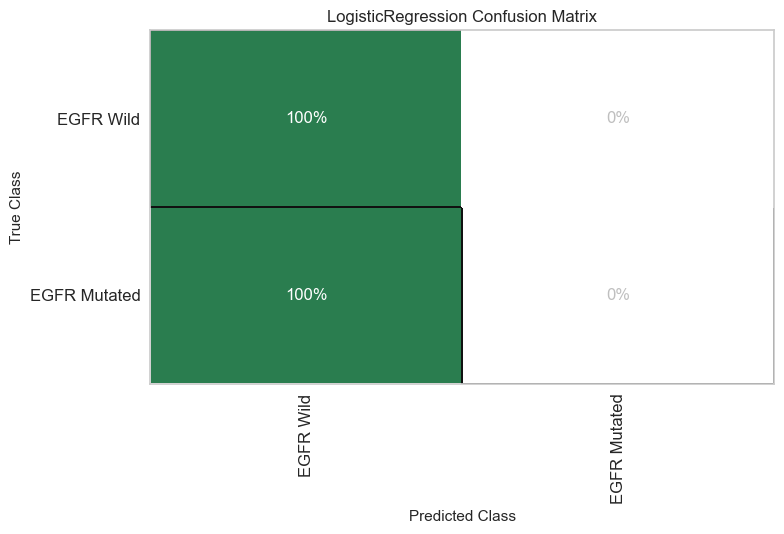

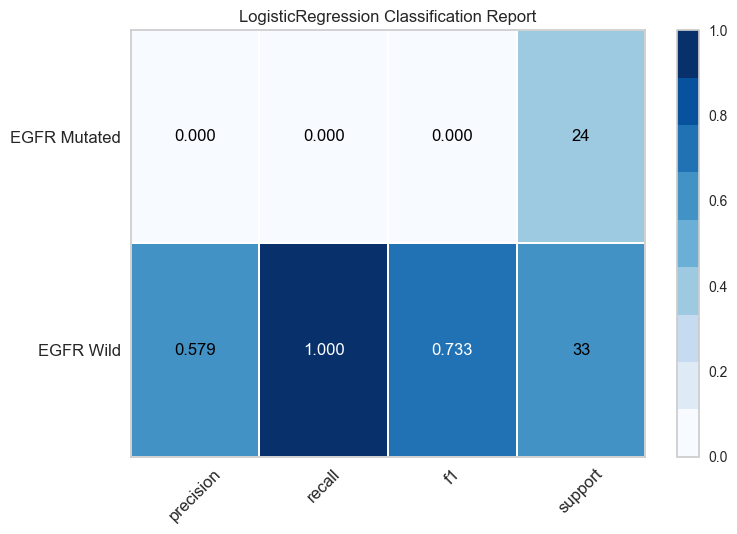

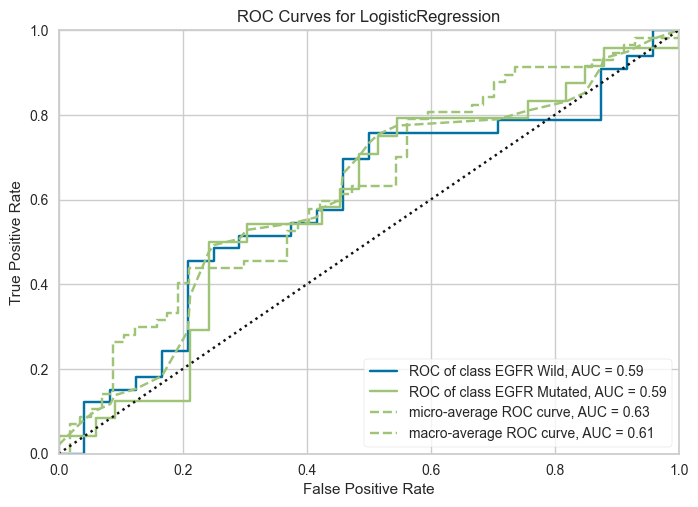

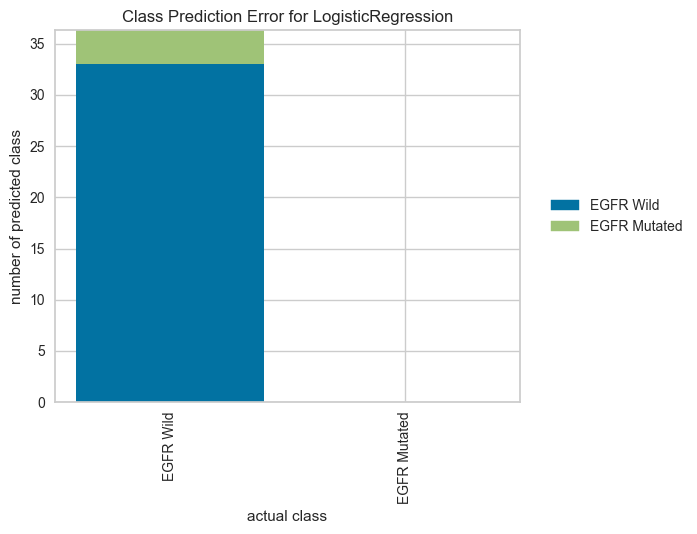

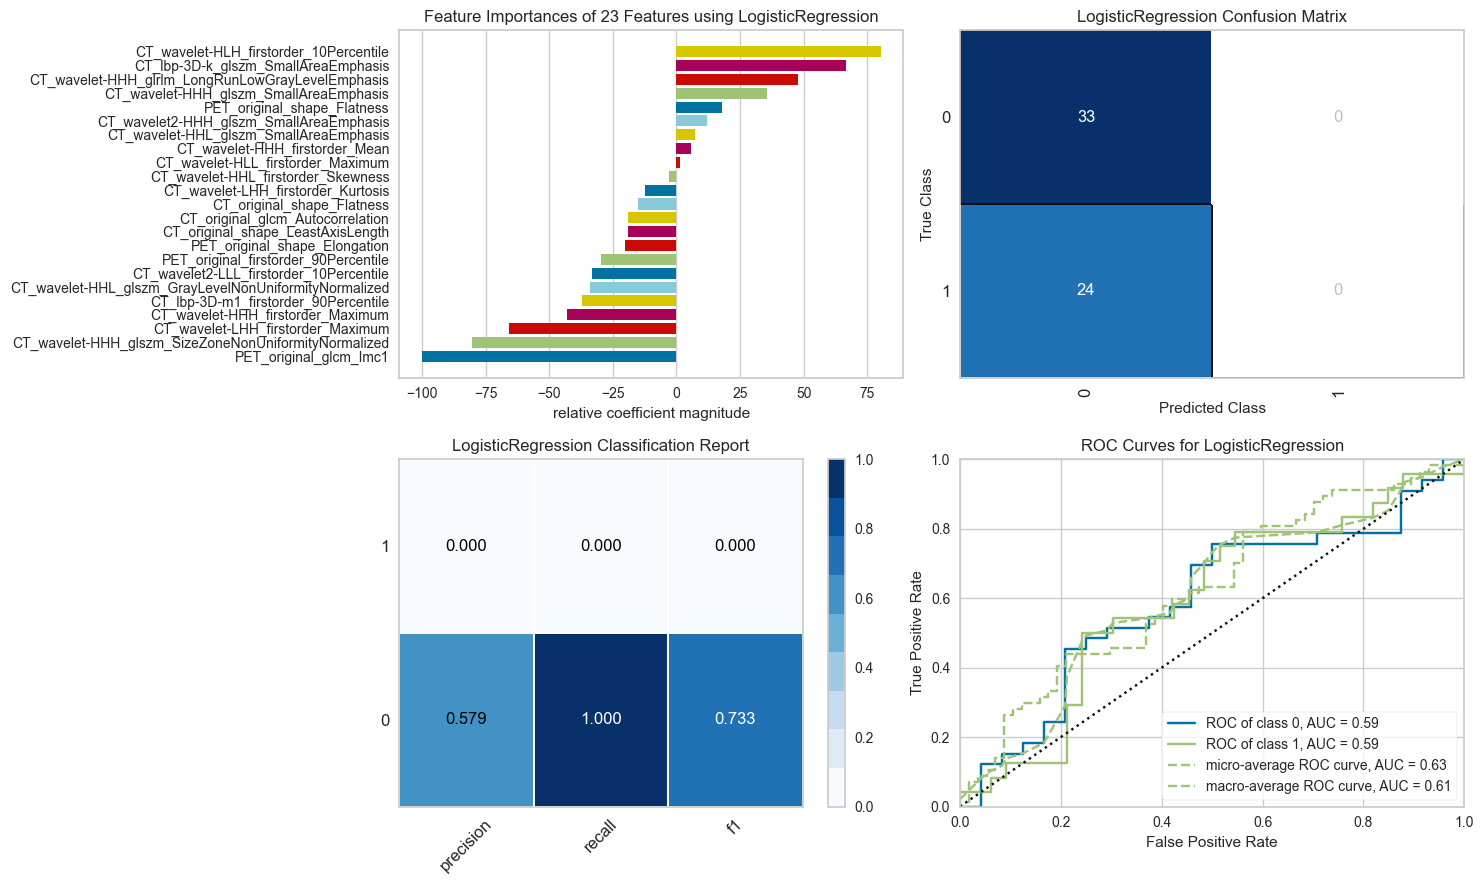

NameError: name 'X' is not defined

In [37]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [38]:
# RandomForestClassifier # 0.876623

rf_model = RandomForestClassifier(random_state=42)
rf_params = {"n_estimators": [500, 800,1000,2000,3000,5000],
             "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
             "max_depth": [1,2,3,4, 5, 8, None]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
rf_cv_model.best_params_ # {'max_depth': None, 'min_samples_split': 7, 'n_estimators': 200}

Fitting 10 folds for each of 378 candidates, totalling 3780 fits


{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 500}

In [39]:
rf_cv_model.best_params_   #0.6425000000000001   {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 10}

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 500}

In [40]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.5

In [41]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB-RF73', Save_format = 'csv',Save_type = 'col')

In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.58      1.00      0.73        33
EGFR Mutated       0.00      0.00      0.00        24

    accuracy                           0.58        57
   macro avg       0.29      0.50      0.37        57
weighted avg       0.34      0.58      0.42        57

precision 0.0 accuracy 0.5789473684210527 recall 0.0 auc 0.5


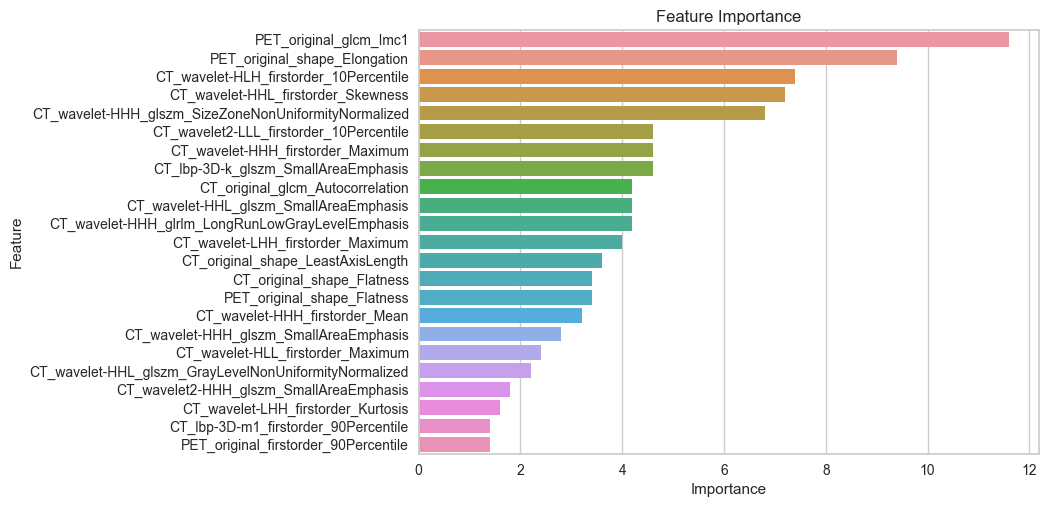

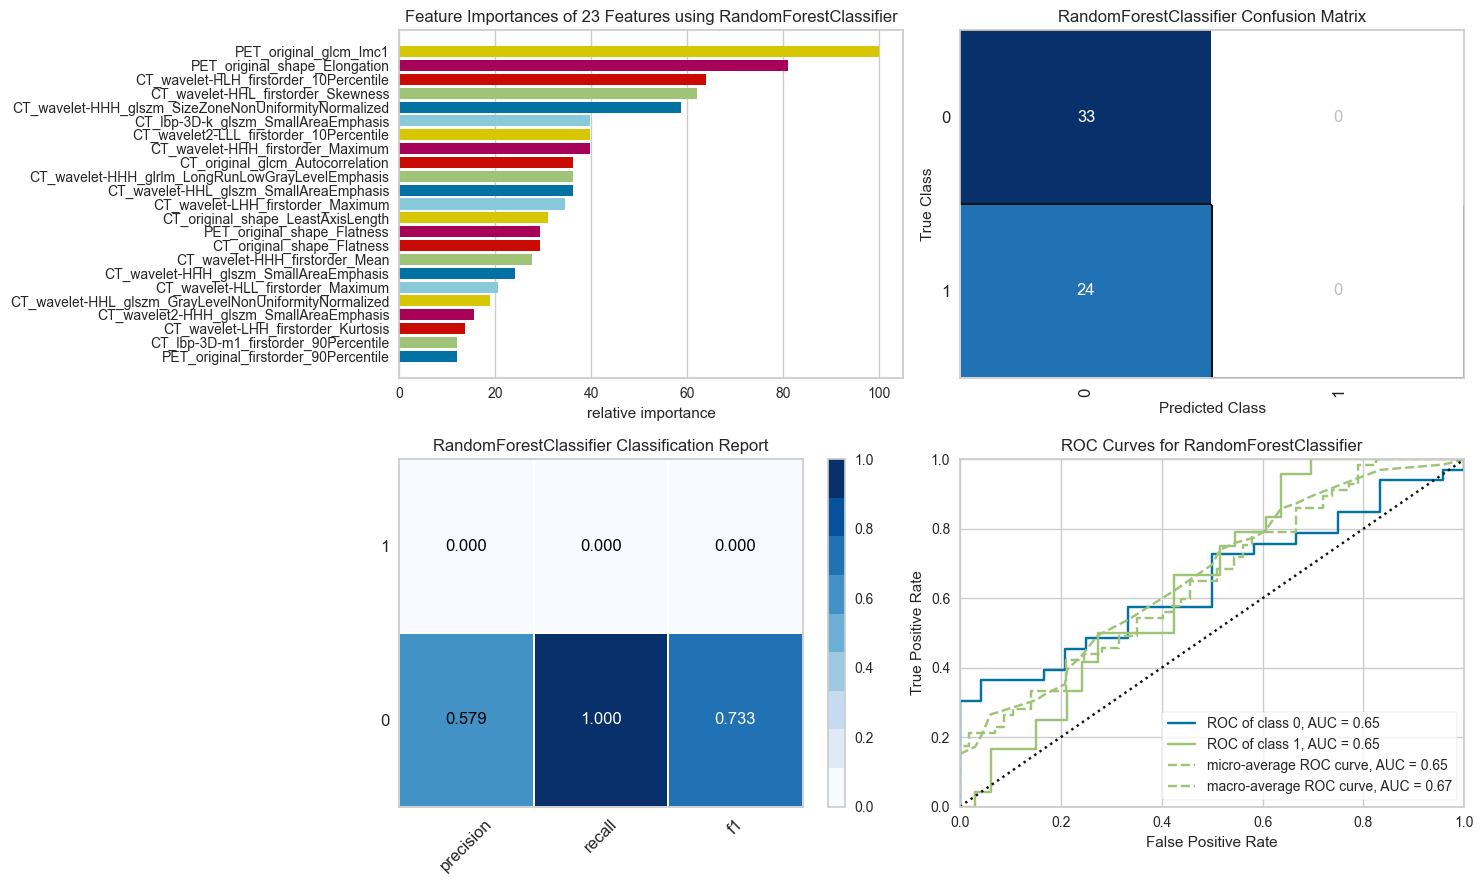

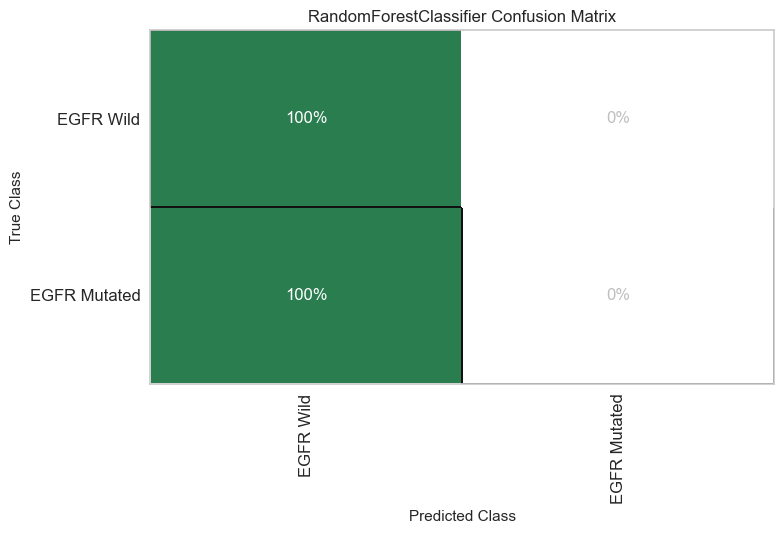

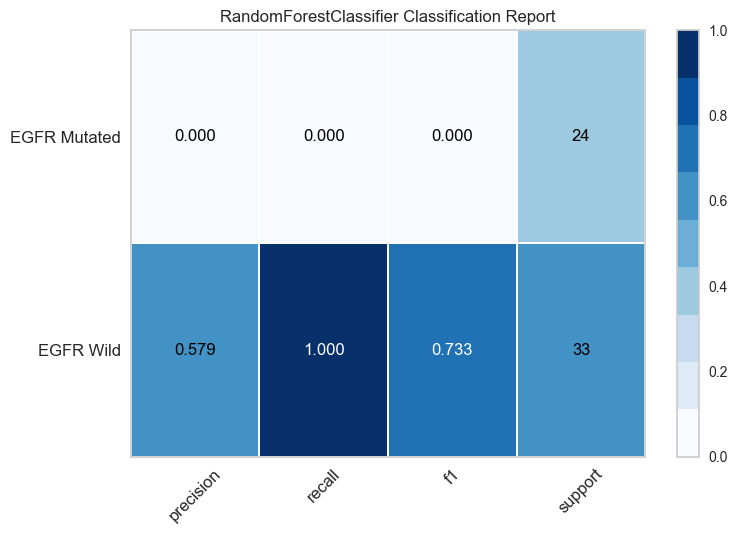

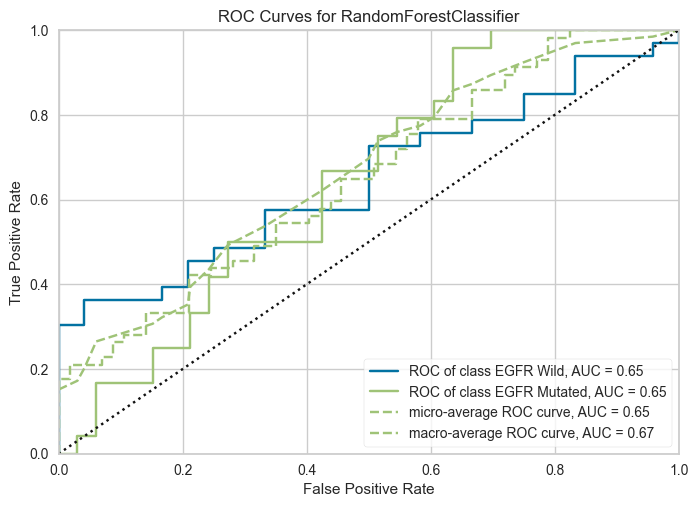

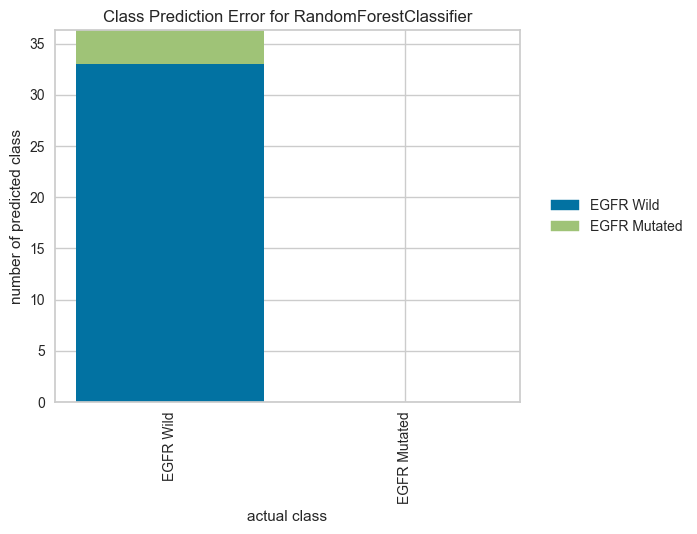

NameError: name 'X' is not defined

In [43]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [154]:
# CatBoostClassifier # 0.883117

from yellowbrick.contrib.wrapper import wrap
cb_model = CatBoostClassifier()
                                        
cb_params = {
#     'depth': [1,2,3,4, 6, 10],
          'learning_rate' : [0.01,0.03,0.05,0.15,0.1,0.3],
#          'l2_leaf_reg': [1,4,9],
         'iterations': [200,300,500,800,1200,2000,3000],
          'early_stopping_rounds':[2000,3000],
#              'subsample':[0.5,1.0],
             'max_depth':[1,3,5,6,8,10, None]
#              'n_estimators':[1000,3000,5000] 
#           'task_type':['GPU'],
#           'loss_function':['Binary'],
          
         }
# {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5000, 'subsample': 0.5}

cb_cv_model = GridSearchCV(cb_model, cb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
cb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}


Fitting 10 folds for each of 588 candidates, totalling 5880 fits
0:	learn: 0.6808937	total: 40.7ms	remaining: 32.6s
1:	learn: 0.6710324	total: 46.3ms	remaining: 18.5s
2:	learn: 0.6646977	total: 47.4ms	remaining: 12.6s
3:	learn: 0.6491705	total: 48.3ms	remaining: 9.62s
4:	learn: 0.6436990	total: 49.4ms	remaining: 7.86s
5:	learn: 0.6337572	total: 50.3ms	remaining: 6.66s
6:	learn: 0.6283393	total: 51.1ms	remaining: 5.78s
7:	learn: 0.6187011	total: 51.8ms	remaining: 5.13s
8:	learn: 0.6126256	total: 52.5ms	remaining: 4.61s
9:	learn: 0.6071476	total: 53.3ms	remaining: 4.21s
10:	learn: 0.5911935	total: 54.1ms	remaining: 3.88s
11:	learn: 0.5848444	total: 54.8ms	remaining: 3.6s
12:	learn: 0.5778514	total: 55.6ms	remaining: 3.37s
13:	learn: 0.5632587	total: 56.4ms	remaining: 3.17s
14:	learn: 0.5592357	total: 57.1ms	remaining: 2.99s
15:	learn: 0.5535302	total: 57.8ms	remaining: 2.83s
16:	learn: 0.5466555	total: 58.5ms	remaining: 2.7s
17:	learn: 0.5422139	total: 59.2ms	remaining: 2.57s
18:	learn: 

192:	learn: 0.0494741	total: 199ms	remaining: 625ms
193:	learn: 0.0493215	total: 200ms	remaining: 623ms
194:	learn: 0.0486994	total: 200ms	remaining: 622ms
195:	learn: 0.0480694	total: 201ms	remaining: 620ms
196:	learn: 0.0478524	total: 202ms	remaining: 618ms
197:	learn: 0.0471655	total: 203ms	remaining: 616ms
198:	learn: 0.0467286	total: 203ms	remaining: 615ms
199:	learn: 0.0460283	total: 204ms	remaining: 613ms
200:	learn: 0.0453294	total: 205ms	remaining: 611ms
201:	learn: 0.0449537	total: 206ms	remaining: 609ms
202:	learn: 0.0444596	total: 207ms	remaining: 607ms
203:	learn: 0.0440408	total: 207ms	remaining: 605ms
204:	learn: 0.0432236	total: 208ms	remaining: 604ms
205:	learn: 0.0429402	total: 209ms	remaining: 602ms
206:	learn: 0.0424839	total: 210ms	remaining: 600ms
207:	learn: 0.0416543	total: 210ms	remaining: 599ms
208:	learn: 0.0410552	total: 211ms	remaining: 597ms
209:	learn: 0.0405776	total: 212ms	remaining: 595ms
210:	learn: 0.0401062	total: 212ms	remaining: 593ms
211:	learn: 

405:	learn: 0.0102464	total: 360ms	remaining: 350ms
406:	learn: 0.0102081	total: 361ms	remaining: 349ms
407:	learn: 0.0101467	total: 362ms	remaining: 347ms
408:	learn: 0.0101001	total: 362ms	remaining: 346ms
409:	learn: 0.0100662	total: 363ms	remaining: 345ms
410:	learn: 0.0100387	total: 364ms	remaining: 345ms
411:	learn: 0.0099680	total: 365ms	remaining: 344ms
412:	learn: 0.0099371	total: 366ms	remaining: 343ms
413:	learn: 0.0099196	total: 366ms	remaining: 342ms
414:	learn: 0.0098899	total: 367ms	remaining: 341ms
415:	learn: 0.0097456	total: 368ms	remaining: 340ms
416:	learn: 0.0096939	total: 369ms	remaining: 339ms
417:	learn: 0.0096939	total: 369ms	remaining: 338ms
418:	learn: 0.0096325	total: 370ms	remaining: 337ms
419:	learn: 0.0095313	total: 371ms	remaining: 336ms
420:	learn: 0.0094845	total: 372ms	remaining: 335ms
421:	learn: 0.0094063	total: 372ms	remaining: 334ms
422:	learn: 0.0093829	total: 373ms	remaining: 333ms
423:	learn: 0.0093563	total: 374ms	remaining: 332ms
424:	learn: 

612:	learn: 0.0052580	total: 524ms	remaining: 160ms
613:	learn: 0.0052403	total: 525ms	remaining: 159ms
614:	learn: 0.0052224	total: 525ms	remaining: 158ms
615:	learn: 0.0052076	total: 526ms	remaining: 157ms
616:	learn: 0.0052075	total: 527ms	remaining: 156ms
617:	learn: 0.0051825	total: 528ms	remaining: 156ms
618:	learn: 0.0051568	total: 529ms	remaining: 155ms
619:	learn: 0.0051433	total: 530ms	remaining: 154ms
620:	learn: 0.0051299	total: 530ms	remaining: 153ms
621:	learn: 0.0051014	total: 531ms	remaining: 152ms
622:	learn: 0.0050773	total: 532ms	remaining: 151ms
623:	learn: 0.0050567	total: 533ms	remaining: 150ms
624:	learn: 0.0050367	total: 533ms	remaining: 149ms
625:	learn: 0.0050273	total: 534ms	remaining: 148ms
626:	learn: 0.0050273	total: 535ms	remaining: 148ms
627:	learn: 0.0050273	total: 536ms	remaining: 147ms
628:	learn: 0.0050273	total: 536ms	remaining: 146ms
629:	learn: 0.0050101	total: 537ms	remaining: 145ms
630:	learn: 0.0049882	total: 538ms	remaining: 144ms
631:	learn: 

{'early_stopping_rounds': 2000,
 'iterations': 800,
 'learning_rate': 0.15,
 'max_depth': 3}

In [155]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.6808937	total: 15.1ms	remaining: 12s
1:	learn: 0.6710324	total: 16.3ms	remaining: 6.49s
2:	learn: 0.6646977	total: 18.1ms	remaining: 4.81s
3:	learn: 0.6491705	total: 19.4ms	remaining: 3.86s
4:	learn: 0.6436990	total: 20ms	remaining: 3.18s
5:	learn: 0.6337572	total: 20.5ms	remaining: 2.72s
6:	learn: 0.6283393	total: 21.1ms	remaining: 2.4s
7:	learn: 0.6187011	total: 21.9ms	remaining: 2.16s
8:	learn: 0.6126256	total: 22.4ms	remaining: 1.97s
9:	learn: 0.6071476	total: 23ms	remaining: 1.82s
10:	learn: 0.5911935	total: 23.7ms	remaining: 1.7s
11:	learn: 0.5848444	total: 24.4ms	remaining: 1.6s
12:	learn: 0.5778514	total: 25ms	remaining: 1.52s
13:	learn: 0.5632587	total: 25.6ms	remaining: 1.44s
14:	learn: 0.5592357	total: 26.2ms	remaining: 1.37s
15:	learn: 0.5535302	total: 26.8ms	remaining: 1.31s
16:	learn: 0.5466555	total: 27.3ms	remaining: 1.26s
17:	learn: 0.5422139	total: 27.9ms	remaining: 1.21s
18:	learn: 0.5311984	total: 28.6ms	remaining: 1.18s
19:	learn: 0.5198391	total: 29.3m

263:	learn: 0.0247914	total: 176ms	remaining: 358ms
264:	learn: 0.0246436	total: 177ms	remaining: 357ms
265:	learn: 0.0244058	total: 177ms	remaining: 356ms
266:	learn: 0.0241821	total: 178ms	remaining: 355ms
267:	learn: 0.0239953	total: 178ms	remaining: 354ms
268:	learn: 0.0237809	total: 179ms	remaining: 353ms
269:	learn: 0.0235777	total: 180ms	remaining: 352ms
270:	learn: 0.0234516	total: 180ms	remaining: 352ms
271:	learn: 0.0231844	total: 181ms	remaining: 351ms
272:	learn: 0.0231273	total: 181ms	remaining: 350ms
273:	learn: 0.0230180	total: 182ms	remaining: 349ms
274:	learn: 0.0227632	total: 182ms	remaining: 348ms
275:	learn: 0.0225201	total: 183ms	remaining: 347ms
276:	learn: 0.0222565	total: 183ms	remaining: 346ms
277:	learn: 0.0220763	total: 184ms	remaining: 345ms
278:	learn: 0.0219623	total: 184ms	remaining: 344ms
279:	learn: 0.0218299	total: 185ms	remaining: 343ms
280:	learn: 0.0217310	total: 185ms	remaining: 342ms
281:	learn: 0.0215925	total: 186ms	remaining: 341ms
282:	learn: 

537:	learn: 0.0065494	total: 340ms	remaining: 165ms
538:	learn: 0.0065311	total: 340ms	remaining: 165ms
539:	learn: 0.0064844	total: 341ms	remaining: 164ms
540:	learn: 0.0064759	total: 342ms	remaining: 164ms
541:	learn: 0.0064722	total: 342ms	remaining: 163ms
542:	learn: 0.0064528	total: 343ms	remaining: 162ms
543:	learn: 0.0064420	total: 343ms	remaining: 161ms
544:	learn: 0.0064269	total: 344ms	remaining: 161ms
545:	learn: 0.0063956	total: 344ms	remaining: 160ms
546:	learn: 0.0063811	total: 345ms	remaining: 159ms
547:	learn: 0.0063530	total: 345ms	remaining: 159ms
548:	learn: 0.0063321	total: 346ms	remaining: 158ms
549:	learn: 0.0063189	total: 346ms	remaining: 157ms
550:	learn: 0.0063048	total: 347ms	remaining: 157ms
551:	learn: 0.0062908	total: 347ms	remaining: 156ms
552:	learn: 0.0062789	total: 348ms	remaining: 155ms
553:	learn: 0.0062748	total: 348ms	remaining: 155ms
554:	learn: 0.0062434	total: 349ms	remaining: 154ms
555:	learn: 0.0062048	total: 350ms	remaining: 153ms
556:	learn: 

0.631578947368421

In [156]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [157]:
# shap.dependence_plot(y_train, shap_values, X_train)

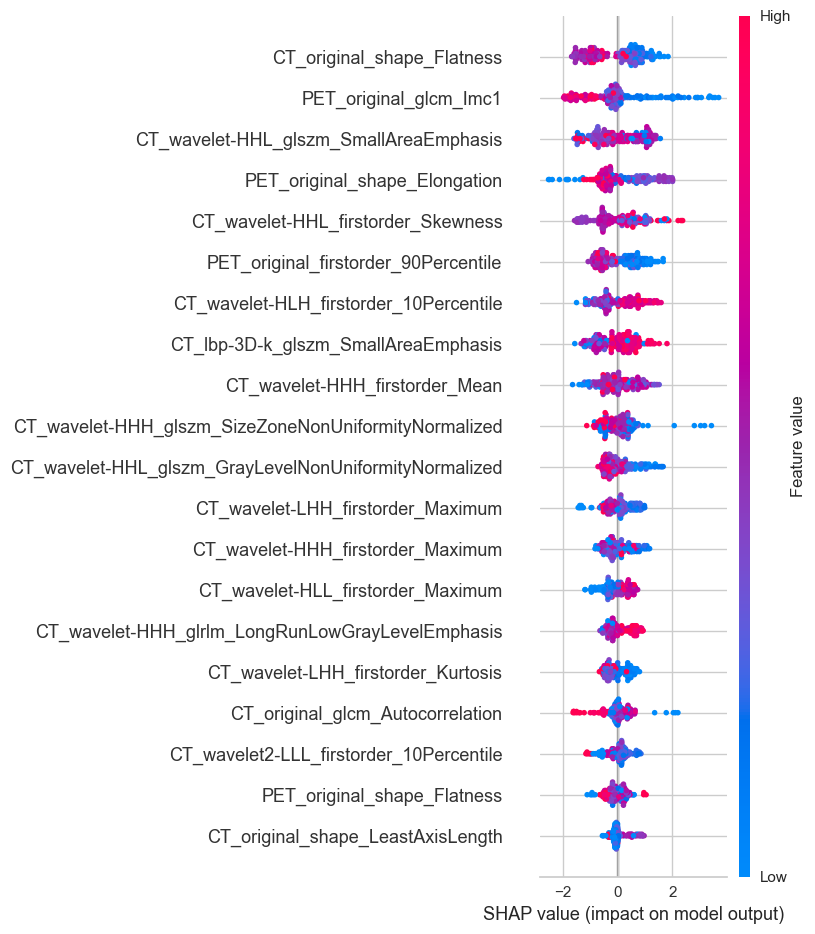

In [158]:

shap.summary_plot(shap_values, X_train)

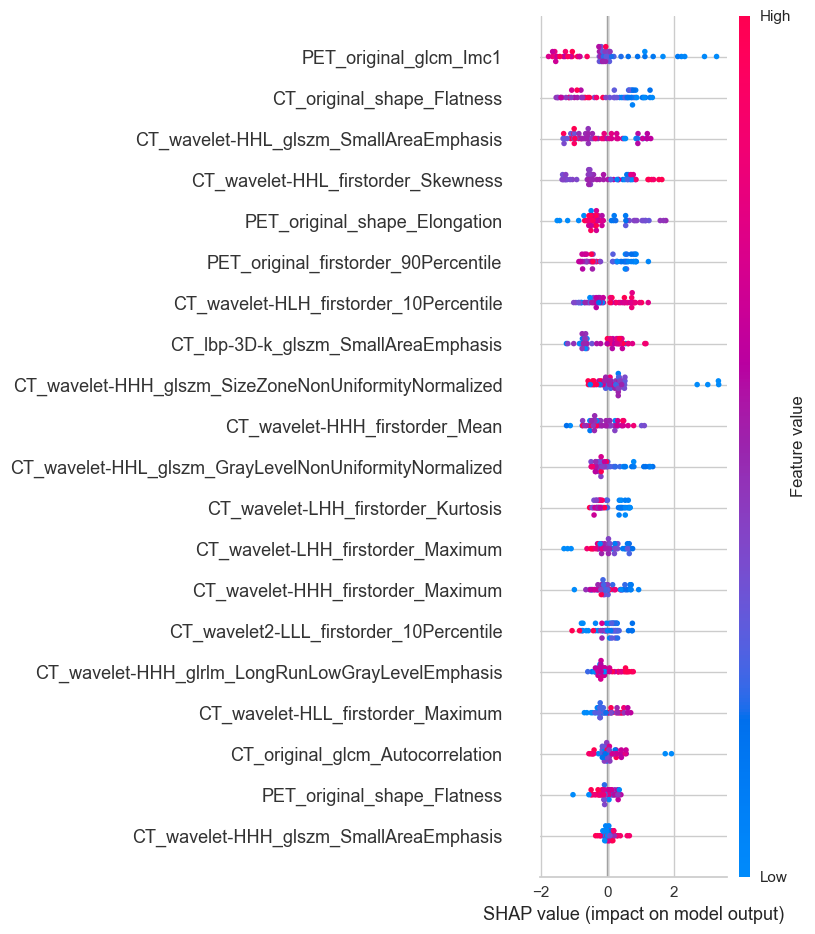

In [159]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [160]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [161]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--NB-CBC73', Save_format = 'csv',Save_type = 'col')

In [162]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--NB-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.63      0.88      0.73        33
EGFR Mutated       0.64      0.29      0.40        24

    accuracy                           0.63        57
   macro avg       0.63      0.59      0.57        57
weighted avg       0.63      0.63      0.59        57

precision 0.6363636363636364 accuracy 0.631578947368421 recall 0.2916666666666667 auc 0.5852272727272727


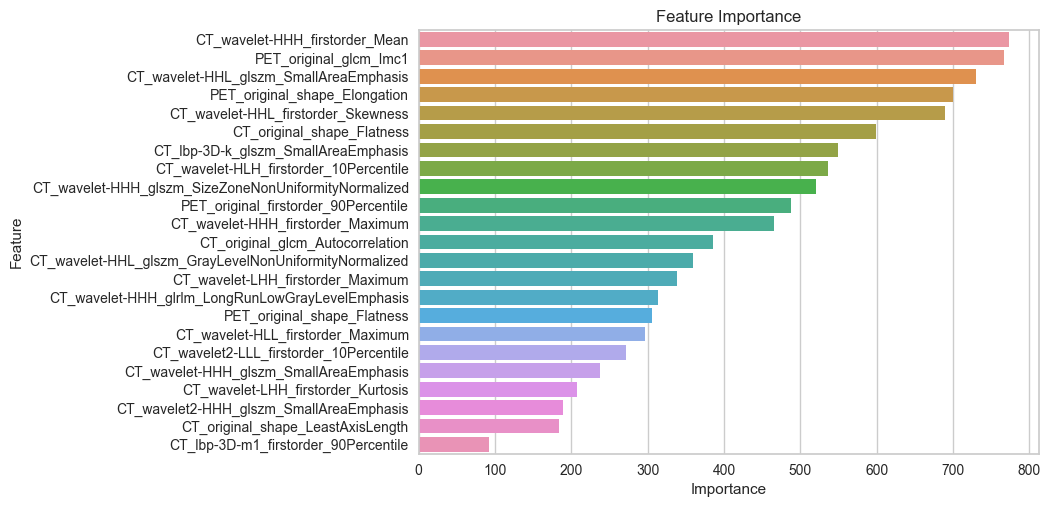

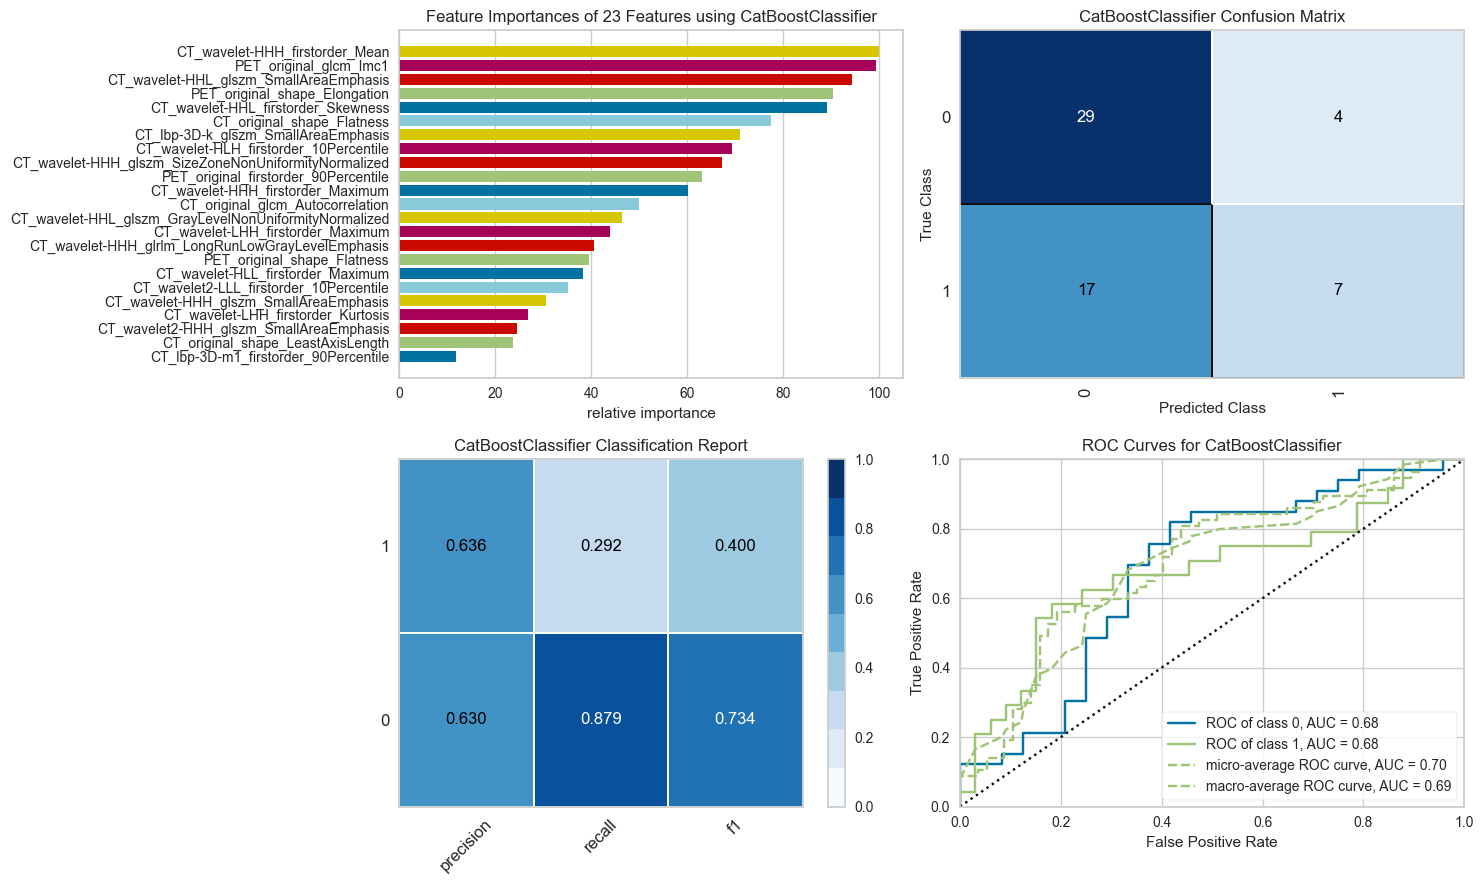

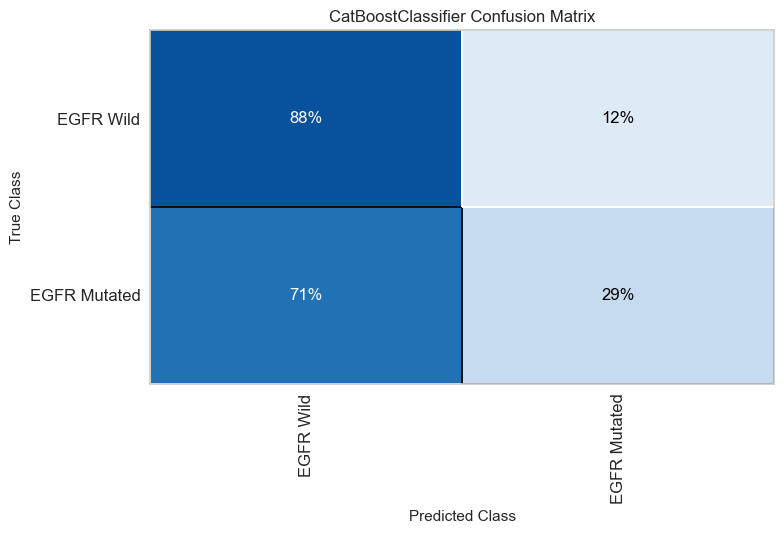

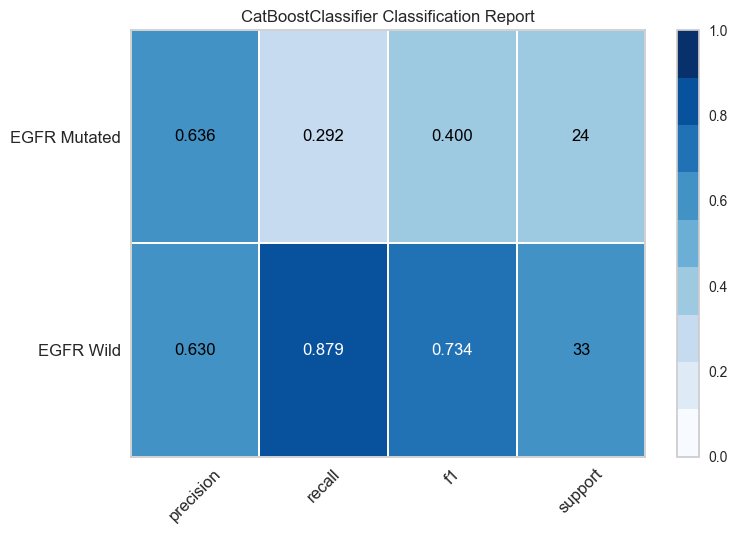

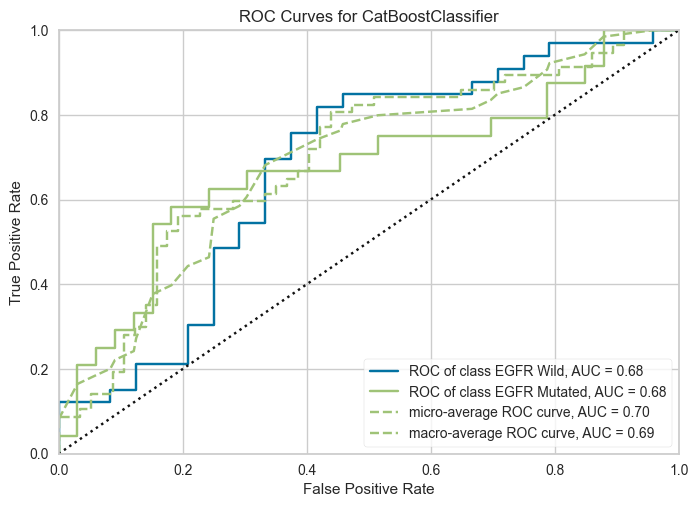

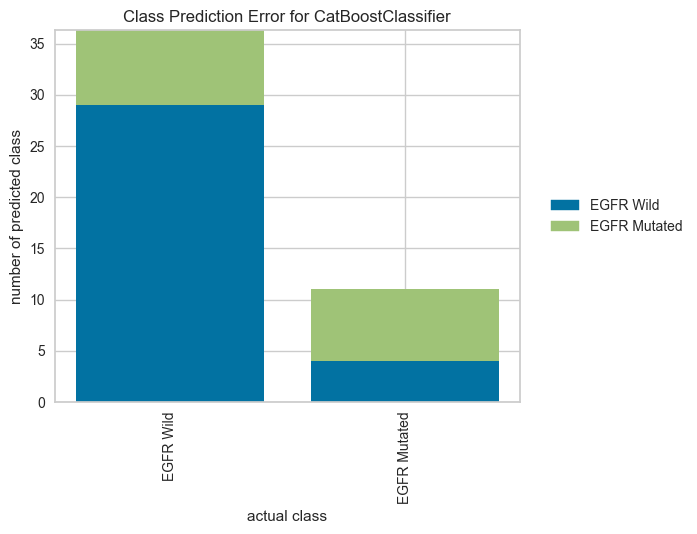

NameError: name 'X' is not defined

In [163]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [44]:
# # AdaBoostClassifier # 0.883117

adb_model = AdaBoostClassifier()
adb_params = {"learning_rate": [0.001, 0.01,0.1, 0.2, 0.5],              
#               "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [200,500,800,1000,2000,3000,5000]#,2000,3000,5000,10000
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

adb_cv_model = GridSearchCV(adb_model, adb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
adb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 35 candidates, totalling 350 fits


{'learning_rate': 0.1, 'n_estimators': 5000}

In [45]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6140350877192983

In [46]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--NB-ADB73', Save_format = 'csv',Save_type = 'col')

In [47]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--NB-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.62      0.85      0.72        33
    EGFR E21       0.58      0.29      0.39        24

    accuracy                           0.61        57
   macro avg       0.60      0.57      0.55        57
weighted avg       0.61      0.61      0.58        57

precision 0.5833333333333334 accuracy 0.6140350877192983 recall 0.2916666666666667 auc 0.5700757575757576


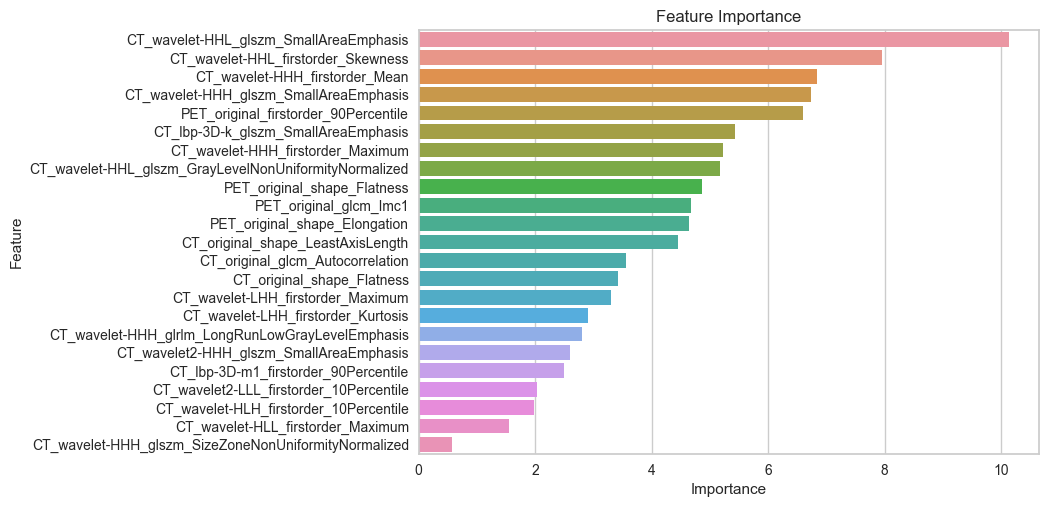

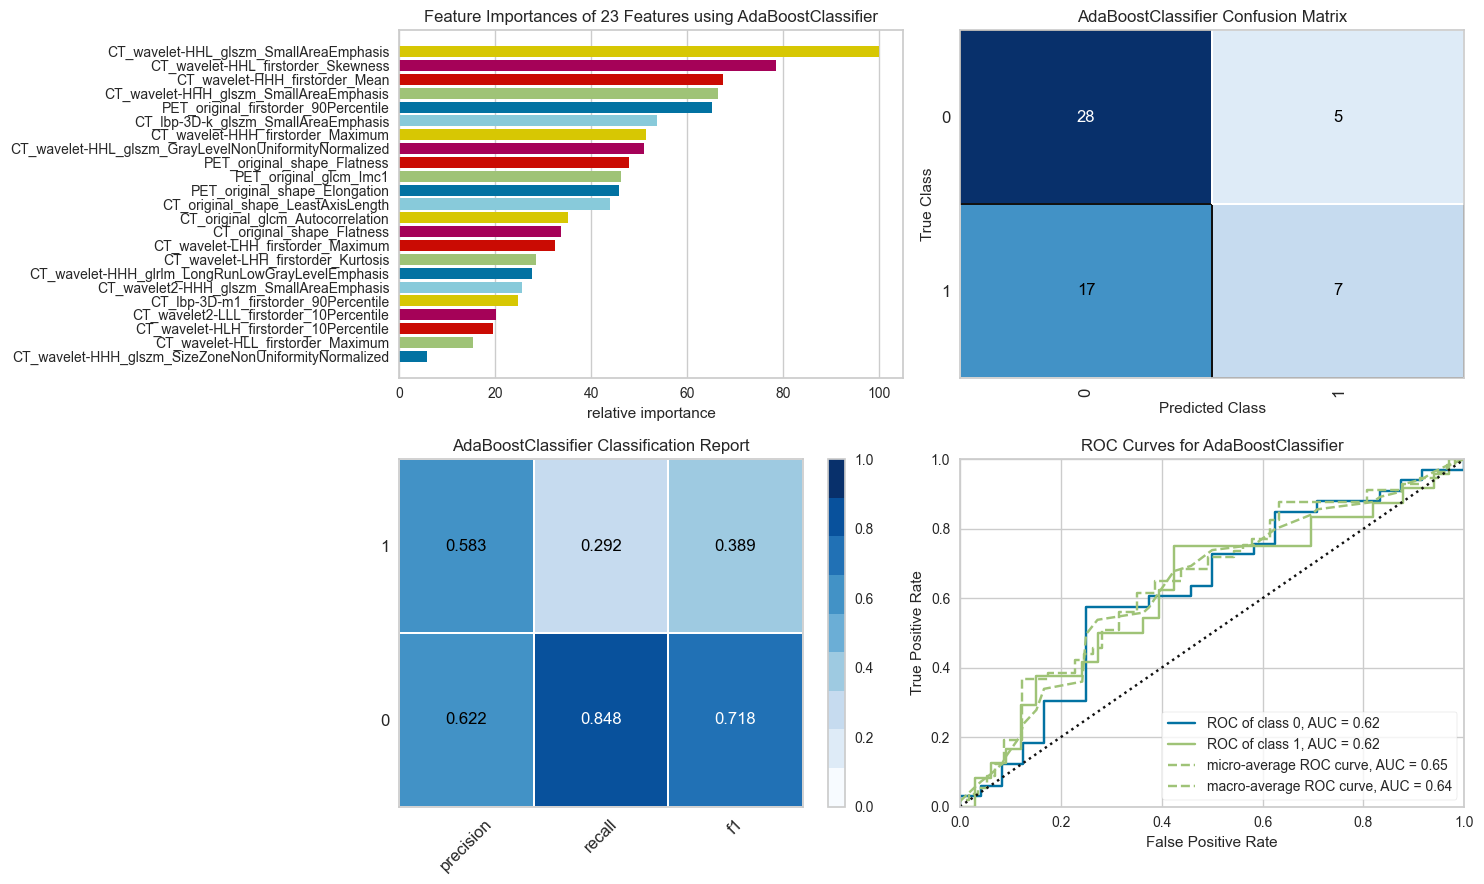

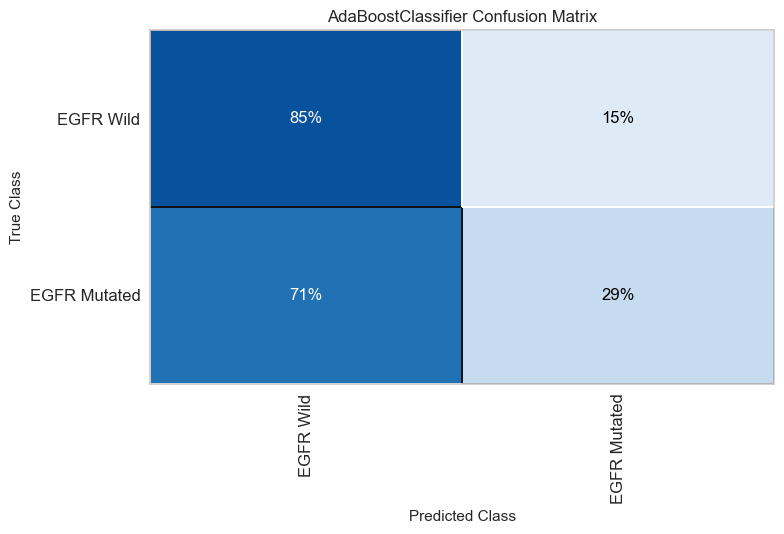

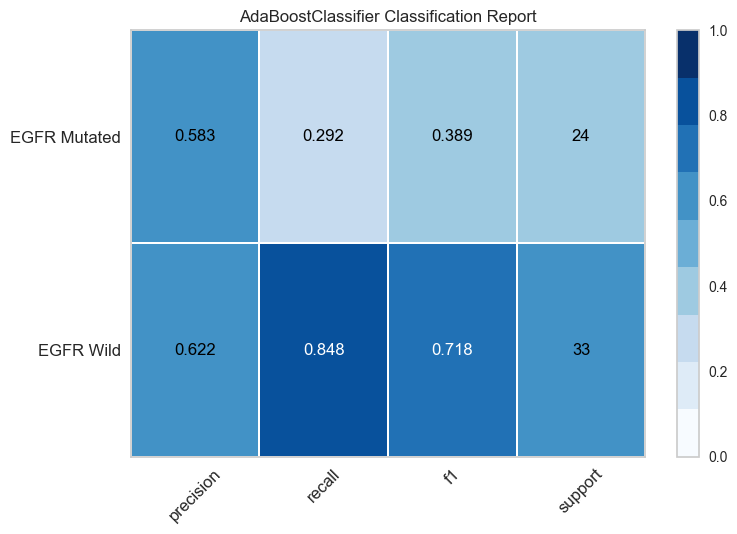

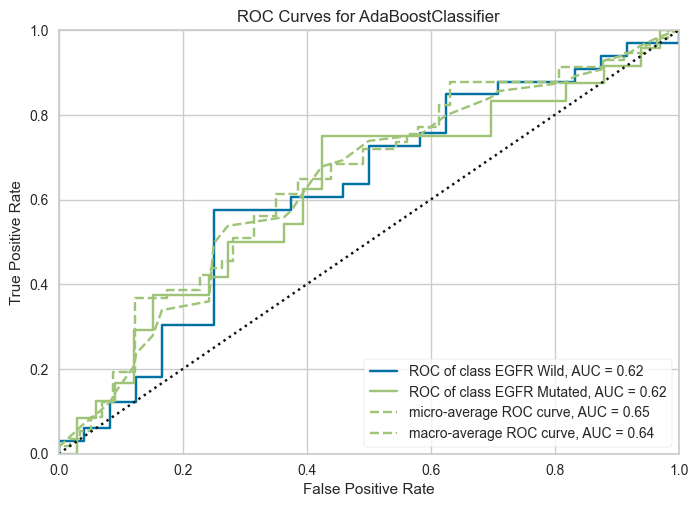

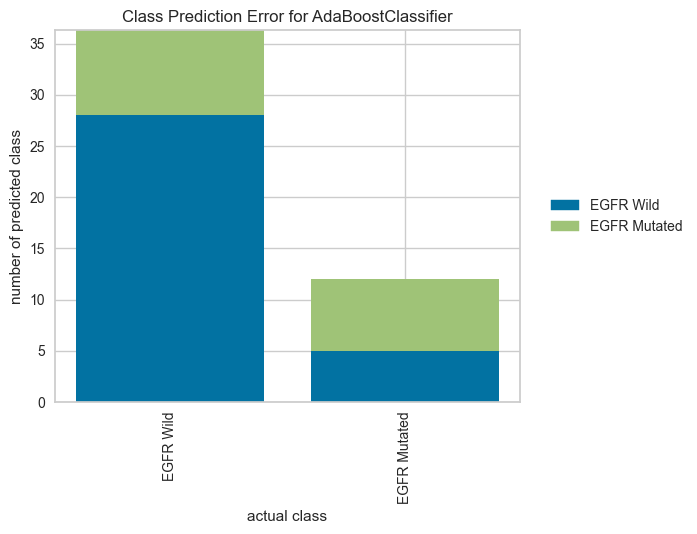

NameError: name 'X' is not defined

In [48]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)
report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [49]:
# # GradientBoostingClassifier # 0.883117

gbdt_model = GradientBoostingClassifier()
gbdt_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.6, 0.7,0.8],
              "n_estimators": [ 200,500,800,1000,2000,3000,5000]#
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

gbdt_cv_model = GridSearchCV(gbdt_model, gbdt_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
gbdt_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


{'learning_rate': 0.1, 'n_estimators': 2000, 'subsample': 0.8}

In [50]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6842105263157895

In [51]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--NB-gbdt', Save_format = 'csv',Save_type = 'col')

In [52]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--NB-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.66      0.94      0.78        33
EGFR Mutated       0.80      0.33      0.47        24

    accuracy                           0.68        57
   macro avg       0.73      0.64      0.62        57
weighted avg       0.72      0.68      0.65        57

precision 0.8 accuracy 0.6842105263157895 recall 0.3333333333333333 auc 0.6363636363636364


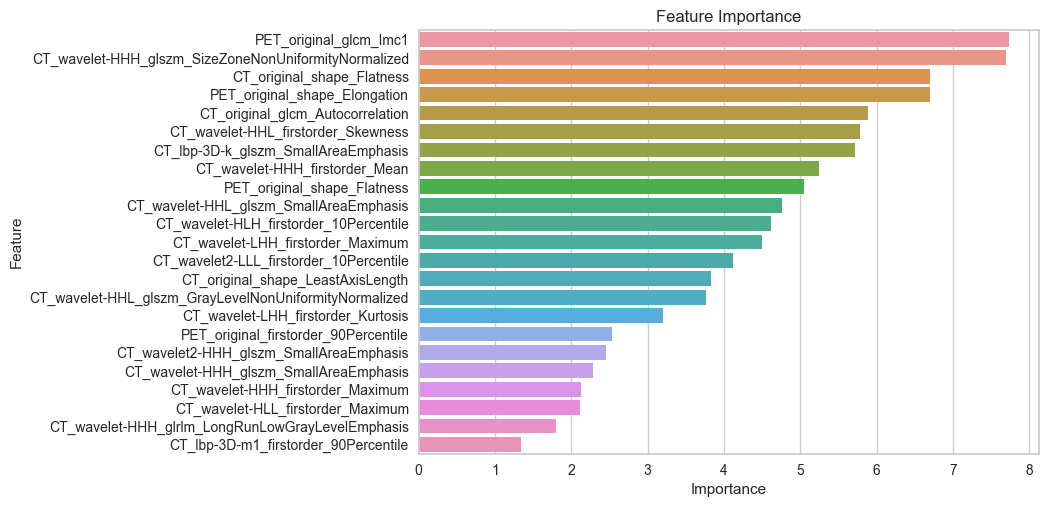

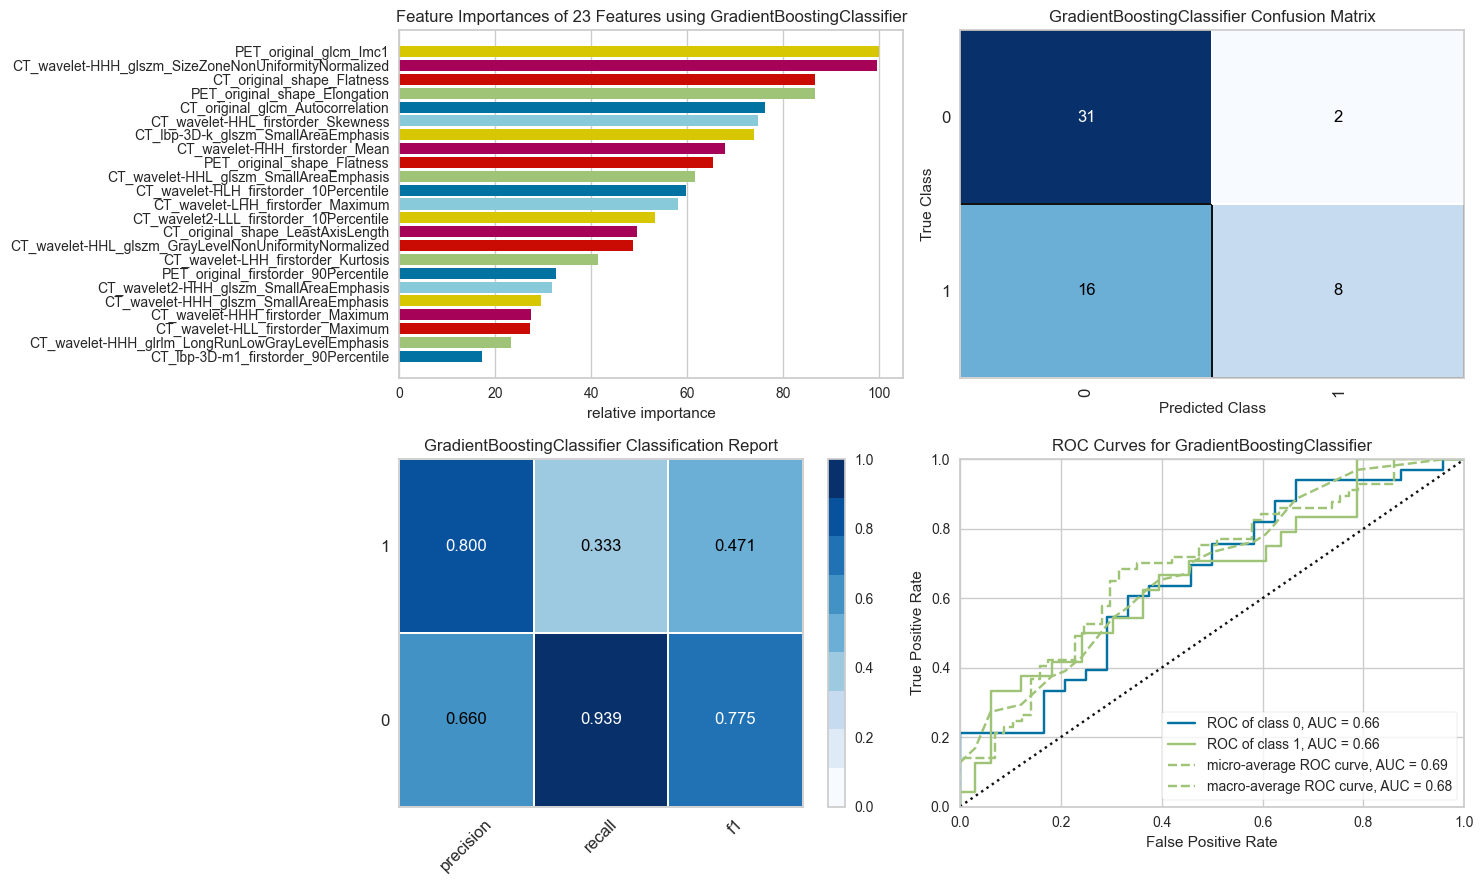

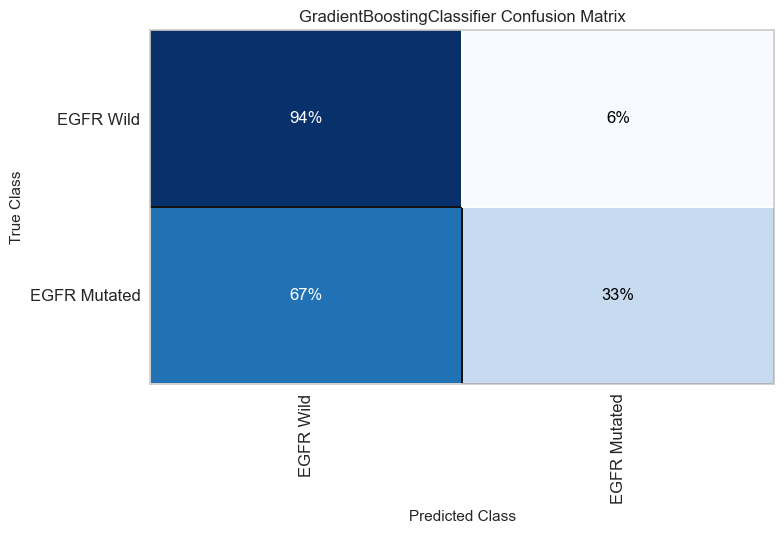

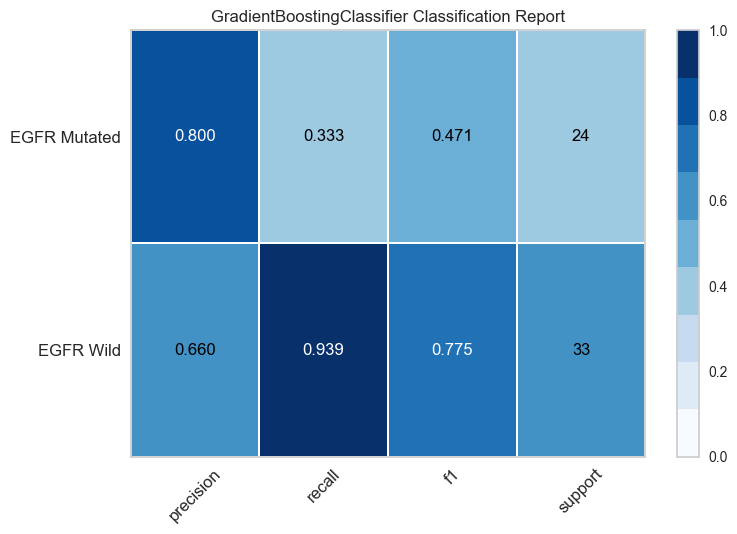

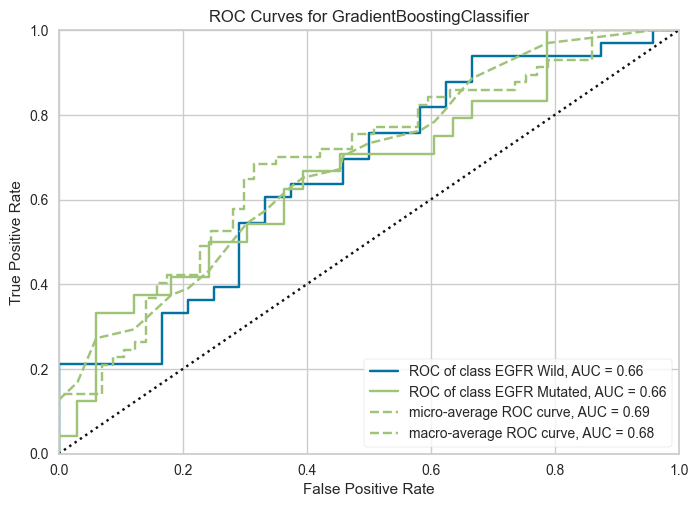

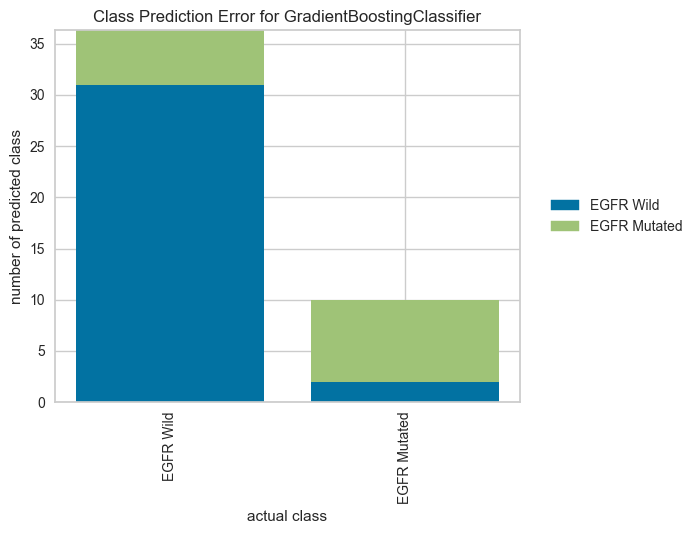

NameError: name 'X' is not defined

In [53]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [54]:
# XGBClassifier # 0.883117

xgb_model = XGBClassifier(random_state=42)
xgb_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [ 500,1000,2000,3000,5000,10000],
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
              "max_depth": [1,2,3,4, 5, 8, None]}

xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
xgb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 2000, 'subsample': 0.5}

Fitting 10 folds for each of 504 candidates, totalling 5040 fits


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.9}

In [57]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.5789473684210527

In [58]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB-XGB73', Save_format = 'csv',Save_type = 'col')

In [59]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.60      0.82      0.69        33
EGFR Mutated       0.50      0.25      0.33        24

    accuracy                           0.58        57
   macro avg       0.55      0.53      0.51        57
weighted avg       0.56      0.58      0.54        57

precision 0.5 accuracy 0.5789473684210527 recall 0.25 auc 0.5340909090909091


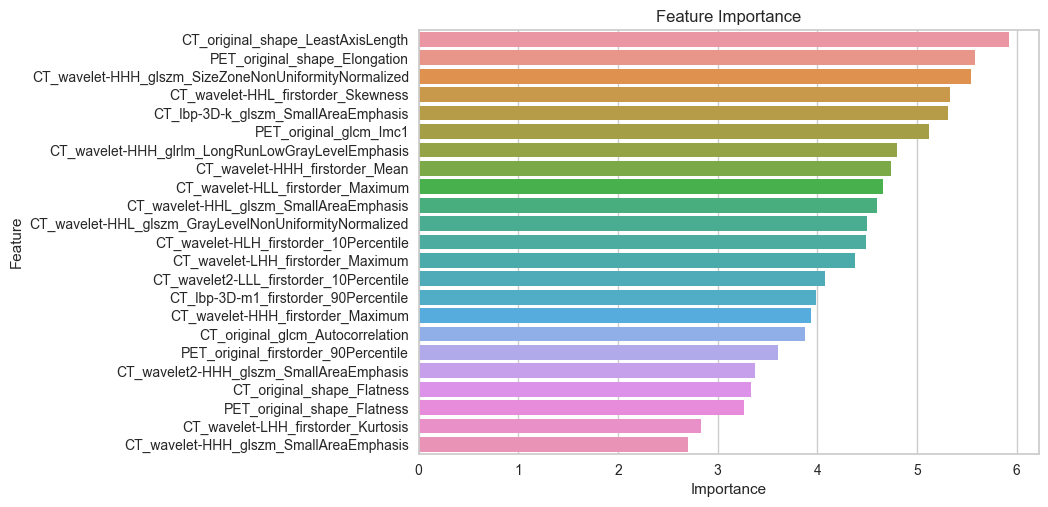

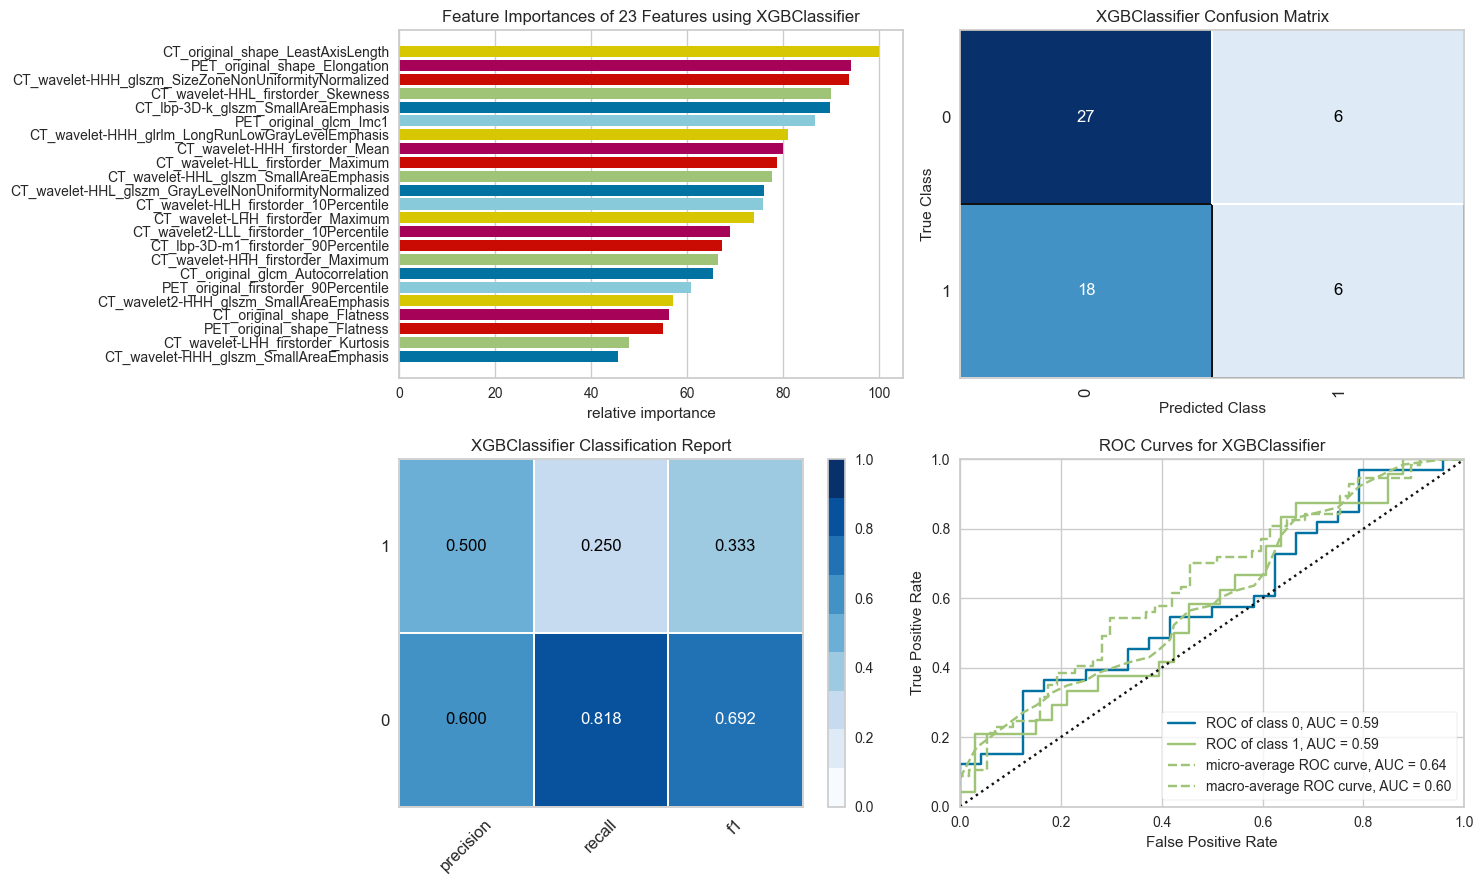

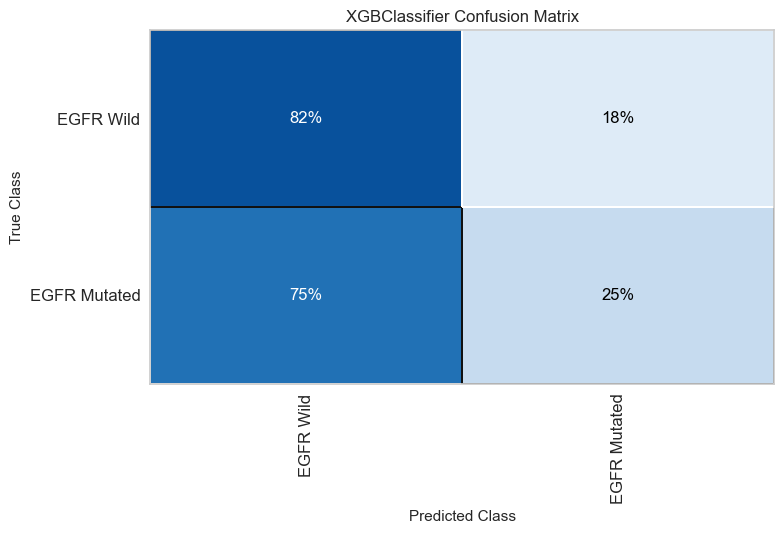

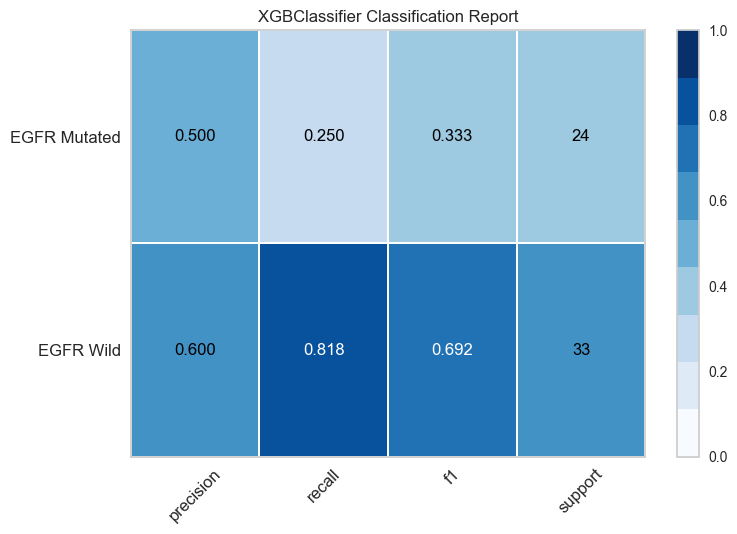

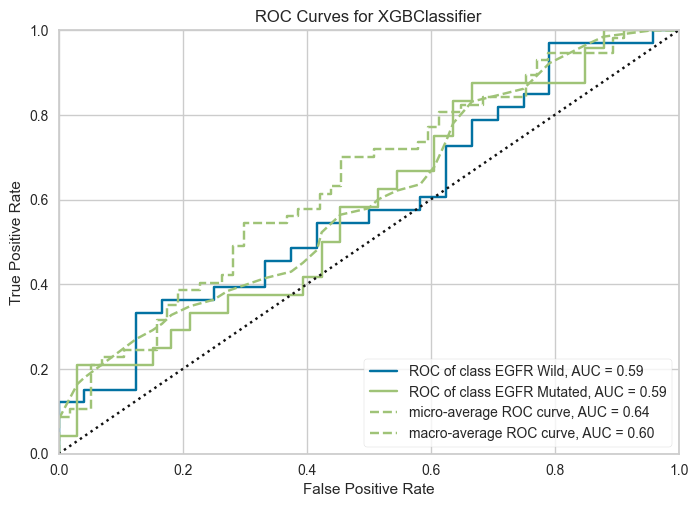

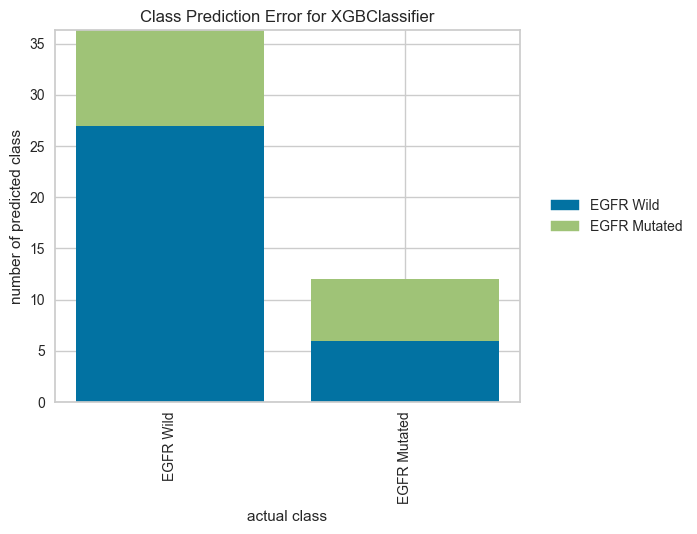

In [60]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [61]:
# LightGBMClassifier # 0.857143

lgbm_model = LGBMClassifier(random_state=42)
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2,0.5],
               "n_estimators": [200,500, 800,1000, 1500,2000,3000,5000],
               "max_depth": [1,2,3,4, 5,6, 8,None]}

lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
lgbm_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 5000}

In [62]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.5964912280701754

In [63]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB-lgb73', Save_format = 'csv',Save_type = 'col')

In [64]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.61      0.85      0.71        33
EGFR Mutated       0.55      0.25      0.34        24

    accuracy                           0.60        57
   macro avg       0.58      0.55      0.53        57
weighted avg       0.58      0.60      0.55        57

precision 0.5454545454545454 accuracy 0.5964912280701754 recall 0.25 auc 0.5492424242424242


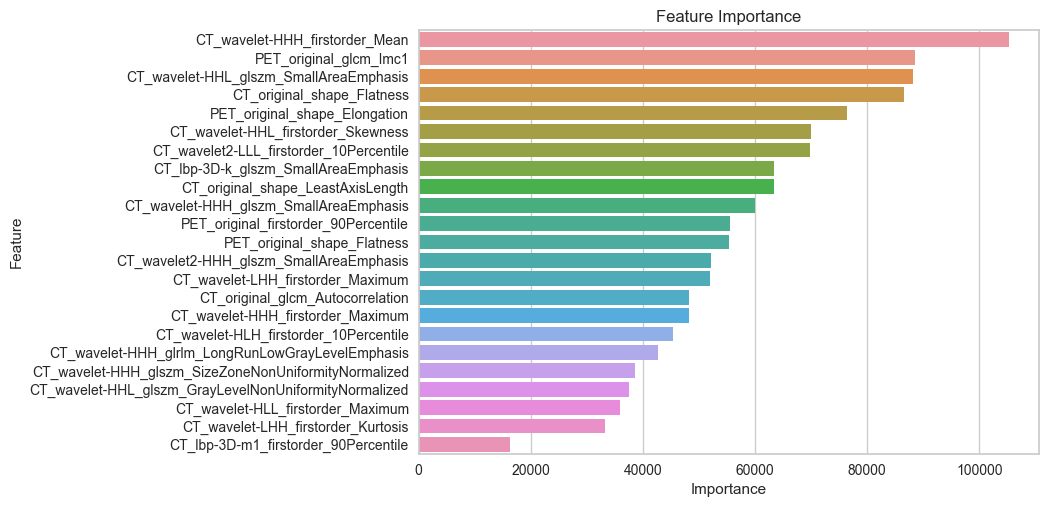

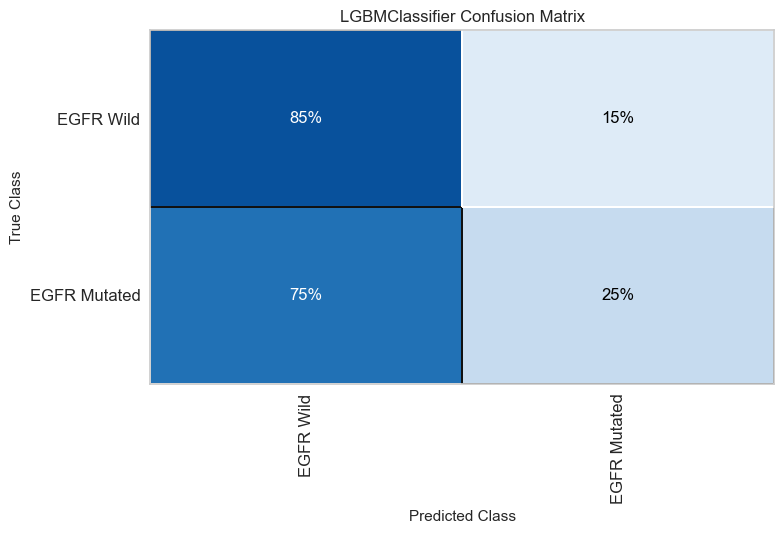

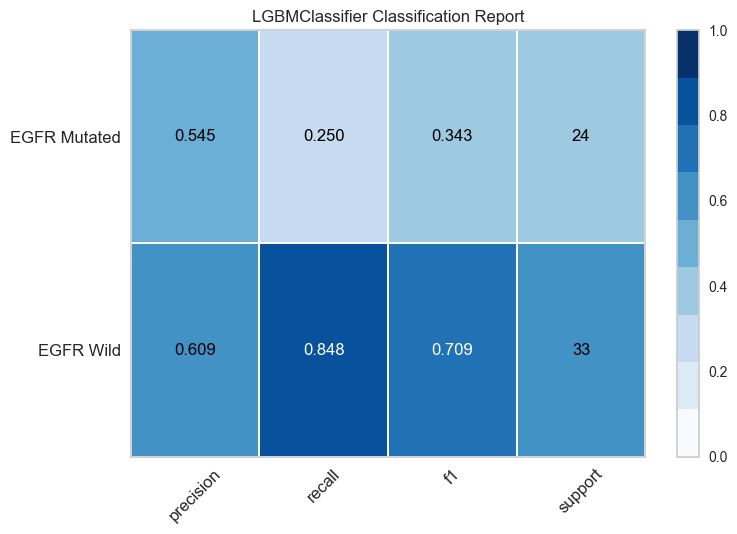

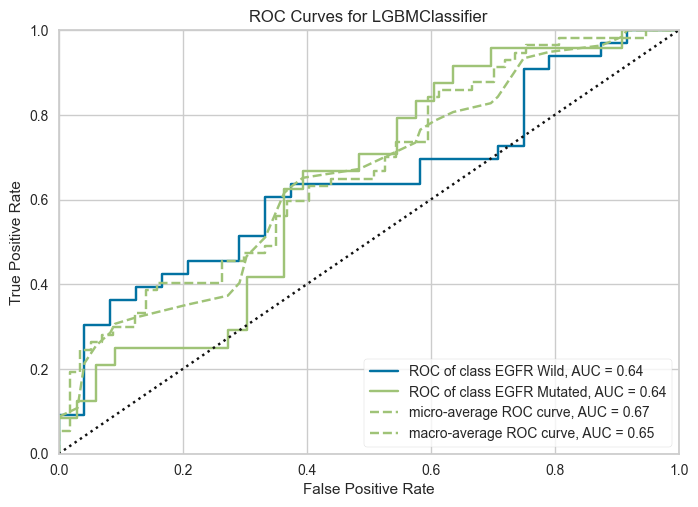

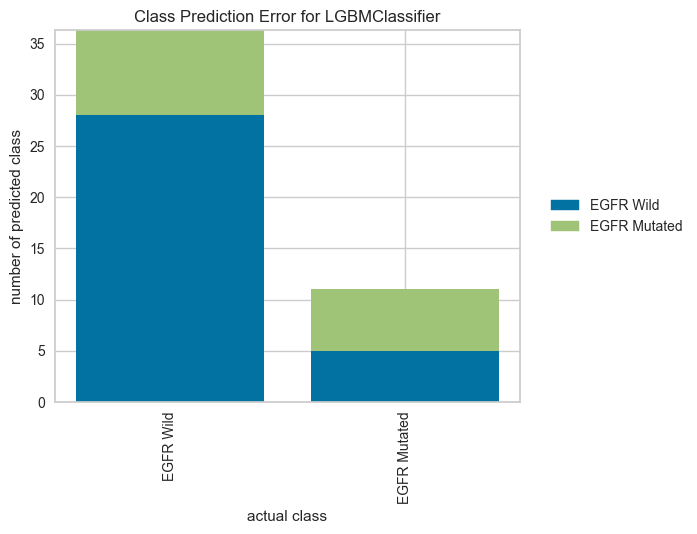

In [65]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

In [66]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_train)




In [67]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

In [68]:
shap.dependence_plot(y_train, shap_values, X_train)

TypeError: The passed shap_values are a list not an array! If you have a list of explanations try passing shap_values[0] instead to explain the first output class of a multi-output model.

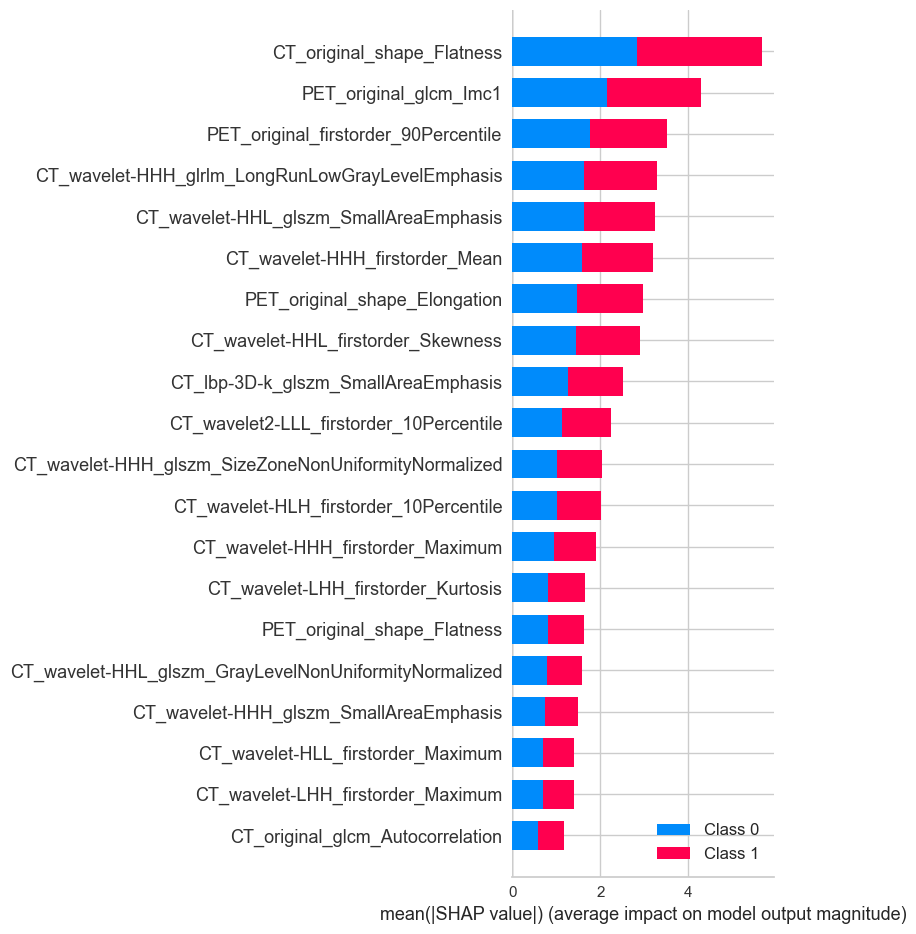

In [69]:
shap.summary_plot(shap_values, X_train)

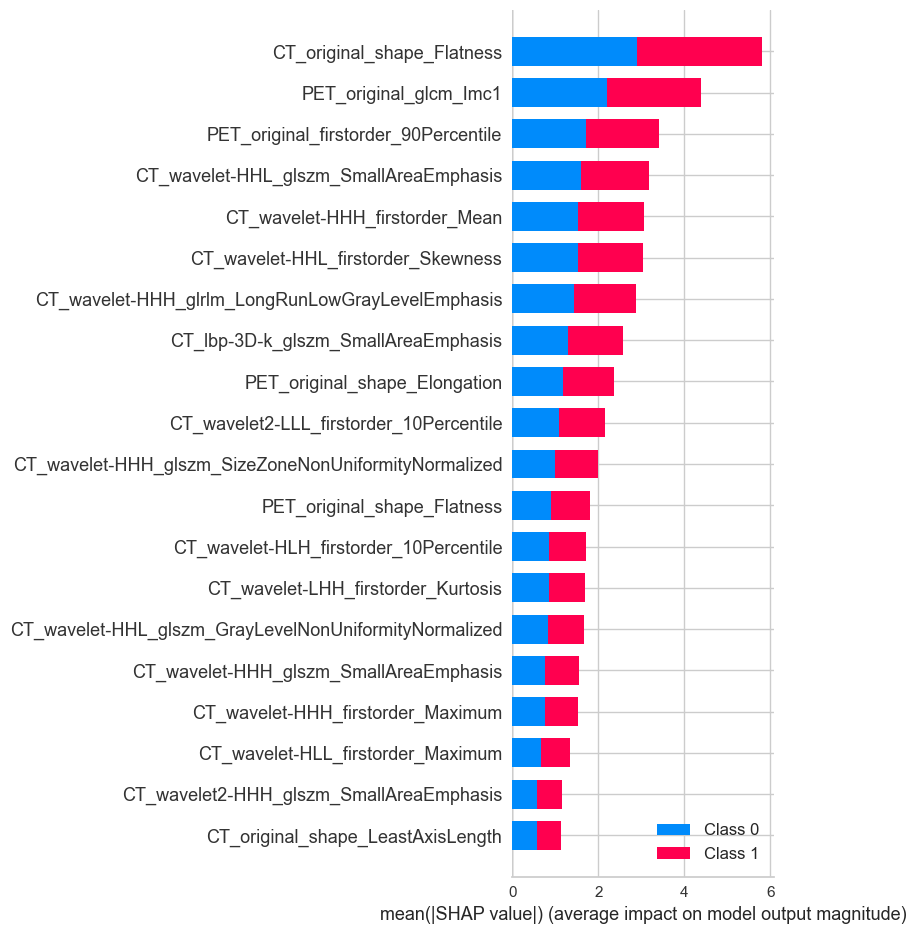

In [70]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [71]:
import shap
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_test)


In [72]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.500000
RF: 0.500000
0:	learn: 0.6808937	total: 25.6ms	remaining: 20.4s
1:	learn: 0.6710324	total: 27.7ms	remaining: 11s
2:	learn: 0.6646977	total: 29.7ms	remaining: 7.89s
3:	learn: 0.6491705	total: 30.8ms	remaining: 6.12s
4:	learn: 0.6436990	total: 31.6ms	remaining: 5.03s
5:	learn: 0.6337572	total: 32.5ms	remaining: 4.29s
6:	learn: 0.6283393	total: 33ms	remaining: 3.74s
7:	learn: 0.6187011	total: 33.7ms	remaining: 3.34s
8:	learn: 0.6126256	total: 34.4ms	remaining: 3.02s
9:	learn: 0.6071476	total: 35ms	remaining: 2.76s
10:	learn: 0.5911935	total: 35.6ms	remaining: 2.55s
11:	learn: 0.5848444	total: 36.1ms	remaining: 2.37s
12:	learn: 0.5778514	total: 36.6ms	remaining: 2.22s
13:	learn: 0.5632587	total: 37.2ms	remaining: 2.09s
14:	learn: 0.5592357	total: 37.9ms	remaining: 1.98s
15:	learn: 0.5535302	total: 38.7ms	remaining: 1.9s
16:	learn: 0.5466555	total: 39.3ms	remaining: 1.81s
17:	learn: 

217:	learn: 0.0382044	total: 148ms	remaining: 396ms
218:	learn: 0.0376535	total: 149ms	remaining: 396ms
219:	learn: 0.0375727	total: 150ms	remaining: 395ms
220:	learn: 0.0366261	total: 150ms	remaining: 393ms
221:	learn: 0.0364413	total: 151ms	remaining: 392ms
222:	learn: 0.0358689	total: 151ms	remaining: 391ms
223:	learn: 0.0355016	total: 152ms	remaining: 390ms
224:	learn: 0.0351046	total: 152ms	remaining: 389ms
225:	learn: 0.0348533	total: 153ms	remaining: 388ms
226:	learn: 0.0347124	total: 153ms	remaining: 387ms
227:	learn: 0.0344100	total: 154ms	remaining: 386ms
228:	learn: 0.0341140	total: 154ms	remaining: 385ms
229:	learn: 0.0335569	total: 155ms	remaining: 384ms
230:	learn: 0.0334371	total: 155ms	remaining: 383ms
231:	learn: 0.0332281	total: 156ms	remaining: 382ms
232:	learn: 0.0330104	total: 157ms	remaining: 381ms
233:	learn: 0.0325676	total: 157ms	remaining: 380ms
234:	learn: 0.0322814	total: 157ms	remaining: 379ms
235:	learn: 0.0322057	total: 158ms	remaining: 378ms
236:	learn: 

516:	learn: 0.0069163	total: 311ms	remaining: 170ms
517:	learn: 0.0068916	total: 311ms	remaining: 169ms
518:	learn: 0.0068472	total: 312ms	remaining: 169ms
519:	learn: 0.0068471	total: 313ms	remaining: 168ms
520:	learn: 0.0068463	total: 313ms	remaining: 168ms
521:	learn: 0.0068462	total: 314ms	remaining: 167ms
522:	learn: 0.0068459	total: 314ms	remaining: 166ms
523:	learn: 0.0068460	total: 315ms	remaining: 166ms
524:	learn: 0.0068460	total: 315ms	remaining: 165ms
525:	learn: 0.0068459	total: 316ms	remaining: 165ms
526:	learn: 0.0068459	total: 316ms	remaining: 164ms
527:	learn: 0.0068058	total: 317ms	remaining: 163ms
528:	learn: 0.0067801	total: 317ms	remaining: 163ms
529:	learn: 0.0067801	total: 318ms	remaining: 162ms
530:	learn: 0.0067363	total: 318ms	remaining: 161ms
531:	learn: 0.0067160	total: 319ms	remaining: 161ms
532:	learn: 0.0066760	total: 319ms	remaining: 160ms
533:	learn: 0.0066613	total: 320ms	remaining: 159ms
534:	learn: 0.0066369	total: 320ms	remaining: 159ms
535:	learn: 

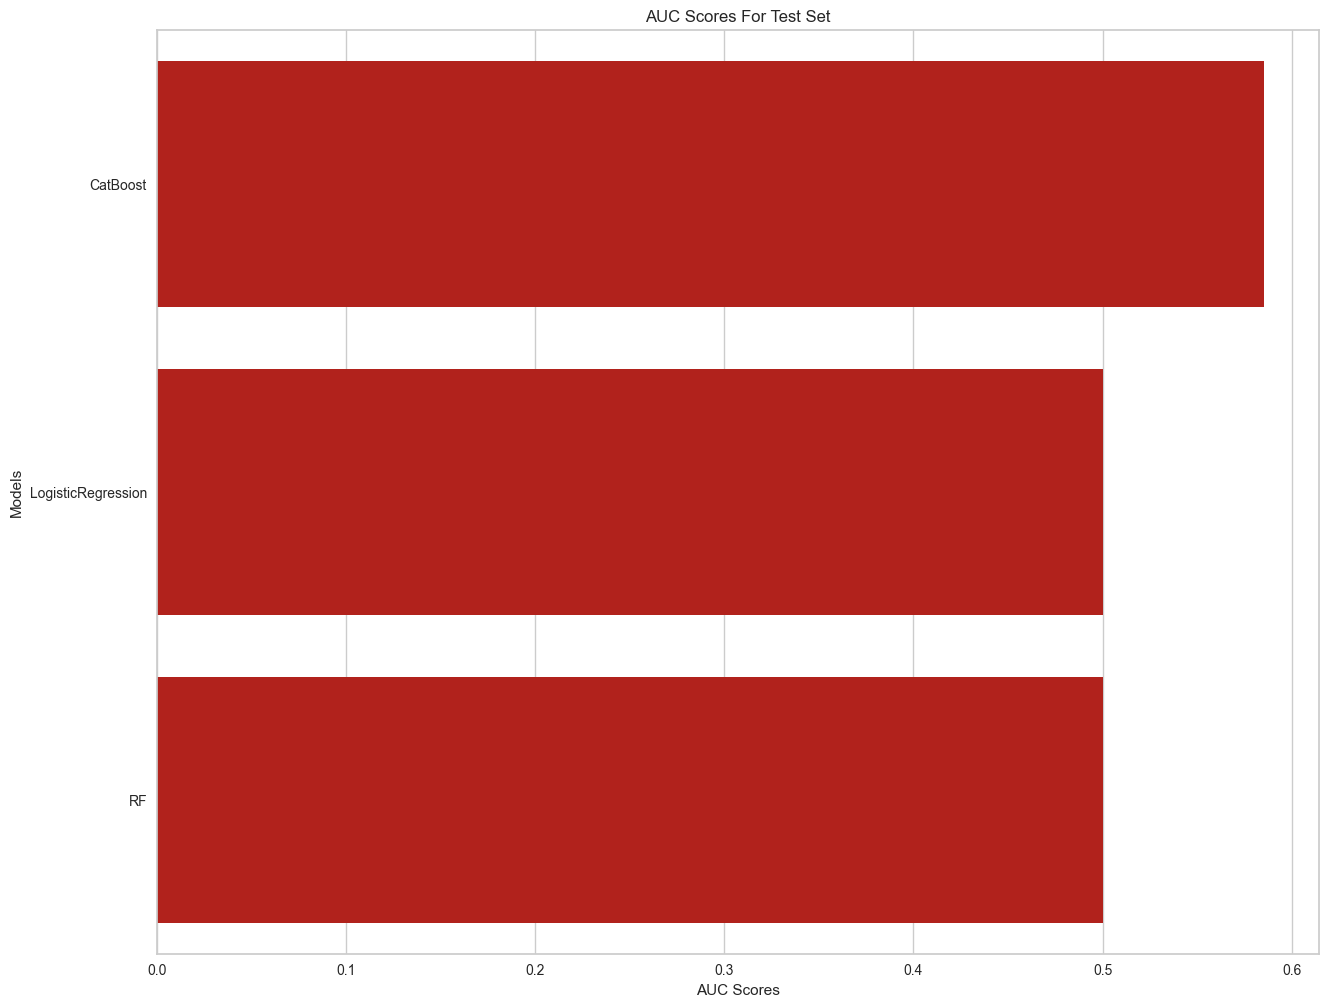

In [164]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [
    ('LogisticRegression', logreg_tuned),
                ('RF', rf_tuned),
#                 ('XGBoost', xgb_tuned),
#                 ('LightGBM', lgbm_tuned),
               ('CatBoost', cb_tuned)
#                 ('SVM', svm_tuned),
#                 ('GBDT', gbdt_tuned),
# #                 ('NGBoost', ngb_tuned),
# #                 ('DT', dt_tuned),
#                 ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

In [153]:
# Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,cb_tuned,svm_tuned,gbdt_tuned,ngb_tuned,dt_tuned,adb_tuned), meta_classifier=xgb_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890


0:	learn: 0.6913043	total: 466us	remaining: 233ms
1:	learn: 0.6894106	total: 1.08ms	remaining: 270ms
2:	learn: 0.6883138	total: 1.54ms	remaining: 255ms
3:	learn: 0.6871873	total: 1.95ms	remaining: 242ms
4:	learn: 0.6845546	total: 2.34ms	remaining: 232ms
5:	learn: 0.6820555	total: 2.76ms	remaining: 227ms
6:	learn: 0.6806537	total: 3.17ms	remaining: 224ms
7:	learn: 0.6792333	total: 3.58ms	remaining: 220ms
8:	learn: 0.6773484	total: 3.99ms	remaining: 218ms
9:	learn: 0.6761950	total: 4.4ms	remaining: 215ms
10:	learn: 0.6736581	total: 4.91ms	remaining: 218ms
11:	learn: 0.6717208	total: 5.35ms	remaining: 218ms
12:	learn: 0.6704542	total: 5.75ms	remaining: 215ms
13:	learn: 0.6693845	total: 6.15ms	remaining: 214ms
14:	learn: 0.6680733	total: 6.58ms	remaining: 213ms
15:	learn: 0.6666074	total: 7.01ms	remaining: 212ms
16:	learn: 0.6639269	total: 7.45ms	remaining: 212ms
17:	learn: 0.6629117	total: 7.88ms	remaining: 211ms
18:	learn: 0.6617477	total: 8.28ms	remaining: 210ms
19:	learn: 0.6602997	tot

370:	learn: 0.4008893	total: 151ms	remaining: 52.5ms
371:	learn: 0.4006165	total: 152ms	remaining: 52.2ms
372:	learn: 0.4004963	total: 152ms	remaining: 51.8ms
373:	learn: 0.4000378	total: 153ms	remaining: 51.4ms
374:	learn: 0.3994239	total: 153ms	remaining: 51ms
375:	learn: 0.3987564	total: 153ms	remaining: 50.6ms
376:	learn: 0.3974919	total: 154ms	remaining: 50.2ms
377:	learn: 0.3971057	total: 154ms	remaining: 49.8ms
378:	learn: 0.3961355	total: 155ms	remaining: 49.4ms
379:	learn: 0.3955762	total: 155ms	remaining: 49ms
380:	learn: 0.3952920	total: 156ms	remaining: 48.6ms
381:	learn: 0.3946990	total: 156ms	remaining: 48.2ms
382:	learn: 0.3941955	total: 156ms	remaining: 47.7ms
383:	learn: 0.3938039	total: 157ms	remaining: 47.3ms
384:	learn: 0.3933823	total: 157ms	remaining: 46.9ms
385:	learn: 0.3927936	total: 158ms	remaining: 46.5ms
386:	learn: 0.3925618	total: 158ms	remaining: 46.1ms
387:	learn: 0.3922111	total: 158ms	remaining: 45.7ms
388:	learn: 0.3917260	total: 159ms	remaining: 45.3

179:	learn: 0.4917567	total: 74.5ms	remaining: 132ms
180:	learn: 0.4914523	total: 75ms	remaining: 132ms
181:	learn: 0.4907059	total: 75.4ms	remaining: 132ms
182:	learn: 0.4900687	total: 75.9ms	remaining: 132ms
183:	learn: 0.4894686	total: 76.4ms	remaining: 131ms
184:	learn: 0.4886206	total: 76.8ms	remaining: 131ms
185:	learn: 0.4882853	total: 77.2ms	remaining: 130ms
186:	learn: 0.4877375	total: 77.6ms	remaining: 130ms
187:	learn: 0.4872053	total: 77.9ms	remaining: 129ms
188:	learn: 0.4861842	total: 78.3ms	remaining: 129ms
189:	learn: 0.4854089	total: 78.8ms	remaining: 129ms
190:	learn: 0.4843534	total: 79.2ms	remaining: 128ms
191:	learn: 0.4837414	total: 79.6ms	remaining: 128ms
192:	learn: 0.4834406	total: 80ms	remaining: 127ms
193:	learn: 0.4831028	total: 80.4ms	remaining: 127ms
194:	learn: 0.4822468	total: 80.8ms	remaining: 126ms
195:	learn: 0.4814440	total: 81.2ms	remaining: 126ms
196:	learn: 0.4812513	total: 81.6ms	remaining: 125ms
197:	learn: 0.4799580	total: 82ms	remaining: 125ms

[iter 0] loss=0.6802 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 500] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 600] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 700] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 800] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 900] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1000] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1100] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1200] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1300] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1400] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1500] loss=0.0605 val_loss=0.00

263:	learn: 0.5248911	total: 159ms	remaining: 143ms
264:	learn: 0.5244321	total: 160ms	remaining: 142ms
265:	learn: 0.5239001	total: 161ms	remaining: 141ms
266:	learn: 0.5237296	total: 161ms	remaining: 141ms
267:	learn: 0.5234640	total: 162ms	remaining: 140ms
268:	learn: 0.5231657	total: 163ms	remaining: 140ms
269:	learn: 0.5229685	total: 163ms	remaining: 139ms
270:	learn: 0.5227594	total: 164ms	remaining: 138ms
271:	learn: 0.5225581	total: 164ms	remaining: 138ms
272:	learn: 0.5221725	total: 165ms	remaining: 137ms
273:	learn: 0.5218820	total: 166ms	remaining: 137ms
274:	learn: 0.5216693	total: 166ms	remaining: 136ms
275:	learn: 0.5214038	total: 167ms	remaining: 135ms
276:	learn: 0.5212425	total: 167ms	remaining: 135ms
277:	learn: 0.5205246	total: 168ms	remaining: 134ms
278:	learn: 0.5198990	total: 168ms	remaining: 133ms
279:	learn: 0.5196429	total: 169ms	remaining: 133ms
280:	learn: 0.5192466	total: 170ms	remaining: 132ms
281:	learn: 0.5189891	total: 170ms	remaining: 132ms
282:	learn: 

[iter 0] loss=0.6796 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.1079 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 200] loss=0.1079 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 300] loss=0.1079 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 400] loss=0.1077 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 500] loss=0.1077 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 600] loss=0.1060 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 700] loss=0.1060 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 800] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 900] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1000] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1100] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1200] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1300] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1400] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1500] loss=0.1061 val_loss=0.00

375:	learn: 0.3702344	total: 159ms	remaining: 52.4ms
376:	learn: 0.3697282	total: 159ms	remaining: 52ms
377:	learn: 0.3694314	total: 160ms	remaining: 51.6ms
378:	learn: 0.3692269	total: 160ms	remaining: 51.2ms
379:	learn: 0.3686564	total: 161ms	remaining: 50.7ms
380:	learn: 0.3677640	total: 161ms	remaining: 50.3ms
381:	learn: 0.3672247	total: 162ms	remaining: 49.9ms
382:	learn: 0.3668360	total: 162ms	remaining: 49.5ms
383:	learn: 0.3665687	total: 162ms	remaining: 49.1ms
384:	learn: 0.3662026	total: 163ms	remaining: 48.6ms
385:	learn: 0.3658207	total: 163ms	remaining: 48.2ms
386:	learn: 0.3653268	total: 164ms	remaining: 47.8ms
387:	learn: 0.3648995	total: 164ms	remaining: 47.4ms
388:	learn: 0.3643337	total: 165ms	remaining: 47ms
389:	learn: 0.3641317	total: 165ms	remaining: 46.5ms
390:	learn: 0.3639030	total: 166ms	remaining: 46.1ms
391:	learn: 0.3634410	total: 166ms	remaining: 45.7ms
392:	learn: 0.3625817	total: 166ms	remaining: 45.3ms
393:	learn: 0.3617720	total: 167ms	remaining: 44.9

177:	learn: 0.5284456	total: 76.6ms	remaining: 139ms
178:	learn: 0.5280909	total: 77.2ms	remaining: 138ms
179:	learn: 0.5277909	total: 77.6ms	remaining: 138ms
180:	learn: 0.5271786	total: 78.1ms	remaining: 138ms
181:	learn: 0.5265316	total: 78.5ms	remaining: 137ms
182:	learn: 0.5258927	total: 78.9ms	remaining: 137ms
183:	learn: 0.5250015	total: 79.3ms	remaining: 136ms
184:	learn: 0.5244836	total: 79.8ms	remaining: 136ms
185:	learn: 0.5238971	total: 80.2ms	remaining: 135ms
186:	learn: 0.5236188	total: 80.7ms	remaining: 135ms
187:	learn: 0.5227836	total: 81.2ms	remaining: 135ms
188:	learn: 0.5219123	total: 81.6ms	remaining: 134ms
189:	learn: 0.5213354	total: 82.1ms	remaining: 134ms
190:	learn: 0.5206292	total: 82.5ms	remaining: 134ms
191:	learn: 0.5202908	total: 83ms	remaining: 133ms
192:	learn: 0.5198191	total: 83.4ms	remaining: 133ms
193:	learn: 0.5180973	total: 83.9ms	remaining: 132ms
194:	learn: 0.5175547	total: 84.3ms	remaining: 132ms
195:	learn: 0.5166599	total: 84.8ms	remaining: 1

[iter 0] loss=0.6802 val_loss=0.0000 scale=2.0000 norm=4.0000


LinAlgError: Singular matrix

In [156]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.05 * logreg_tuned.predict(X_test)) +
            (0.05 * dt_tuned.predict(X_test)) +
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.1 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.1 * lgbm_tuned.predict(X_test)) +
            (0.1 * cb_tuned.predict(X_test)) +
             (0.1 * ngb_tuned.predict(X_test)) +
            (0.1 * stack_gen_model.predict(X_test)))

In [157]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
roc_auc_score(y_test, blend_models_predict(X_test).round())

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [109]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--NB-stack73', Save_format = 'csv',Save_type = 'col')

In [165]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/RFE-RF-GB/NB")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [166]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [167]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/ExternalTest-FS-ZSCORE-MI-NB.csv"
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [168]:
OSPath = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split"

In [169]:
######CatBoost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB/CatBoost.pkl'
finalpkl =  OSPath + pathpkl
cgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=cgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-cgb-NB-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# cgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/CatBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-cgb-RFERF19-73.csv', external_test_pred, delimiter = ',')

auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.49      0.71      0.58        42
EGFR Mutated       0.69      0.47      0.56        58

    accuracy                           0.57       100
   macro avg       0.59      0.59      0.57       100
weighted avg       0.61      0.57      0.57       100

precision 0.6923076923076923 accuracy 0.57 recall 0.46551724137931033 auc 0.5899014778325122


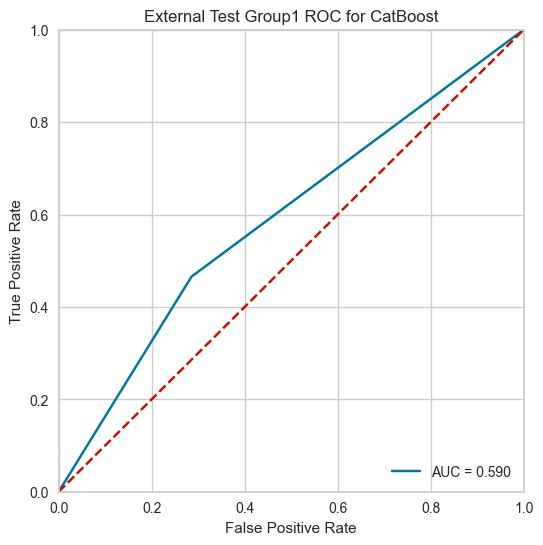

In [170]:
######CatBoost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [171]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[30 12]
 [31 27]]
Normalized confusion matrix
[[0.71 0.29]
 [0.53 0.47]]


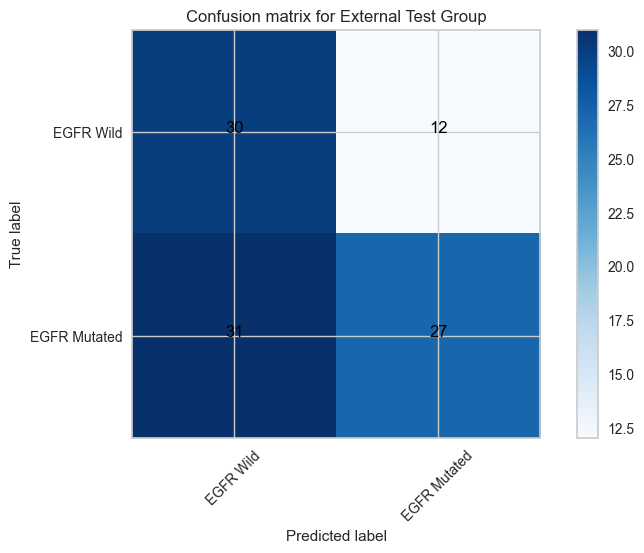

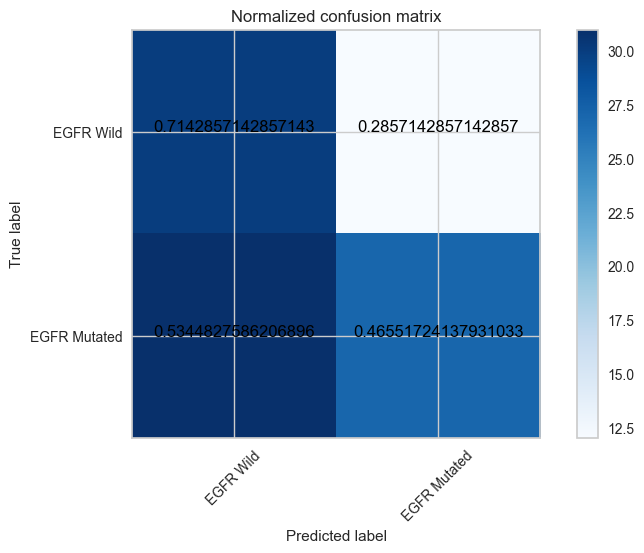

In [172]:
######CatBoost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [103]:
######adaboost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-adb-NB-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.52      0.76      0.62        42
EGFR Mutated       0.74      0.48      0.58        58

    accuracy                           0.60       100
   macro avg       0.63      0.62      0.60       100
weighted avg       0.64      0.60      0.60       100

precision 0.7368421052631579 accuracy 0.6 recall 0.4827586206896552 auc 0.6223316912972086


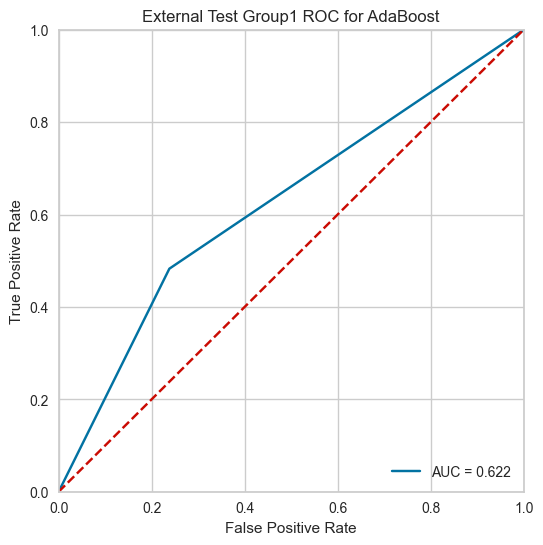

In [104]:
######adaboost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [105]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[32 10]
 [30 28]]
Normalized confusion matrix
[[0.76 0.24]
 [0.52 0.48]]


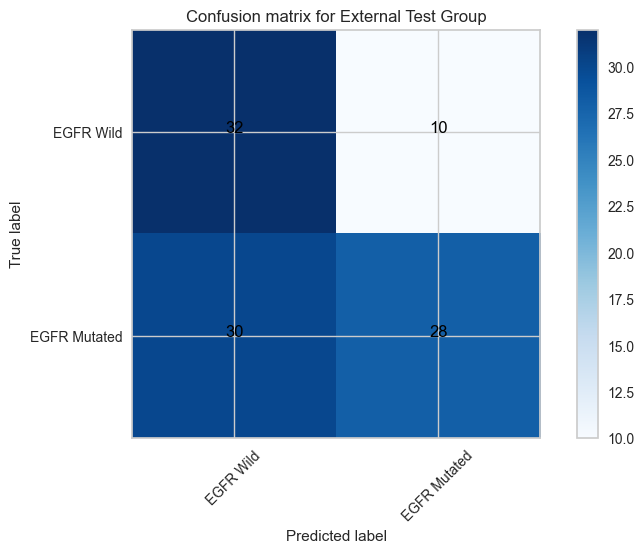

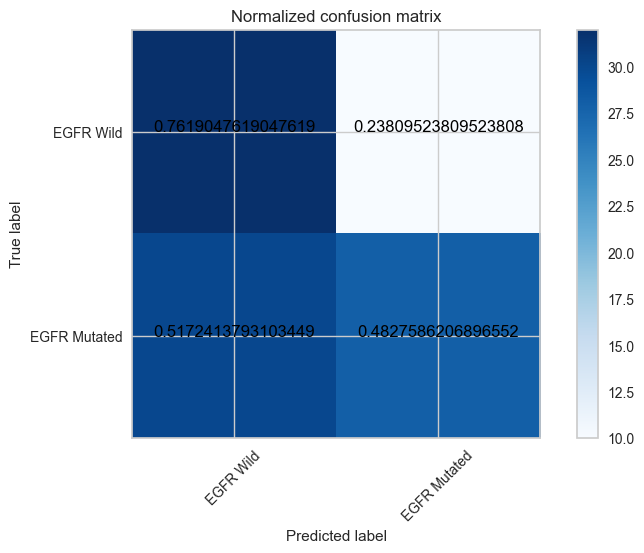

In [106]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [107]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-NB-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


              precision    recall  f1-score   support

   EGFR Wild       0.43      0.74      0.54        42
EGFR Mutated       0.61      0.29      0.40        58

    accuracy                           0.48       100
   macro avg       0.52      0.52      0.47       100
weighted avg       0.53      0.48      0.46       100

precision 0.5188492063492063 accuracy 0.48 recall 0.5155993431855501 auc 0.5155993431855501


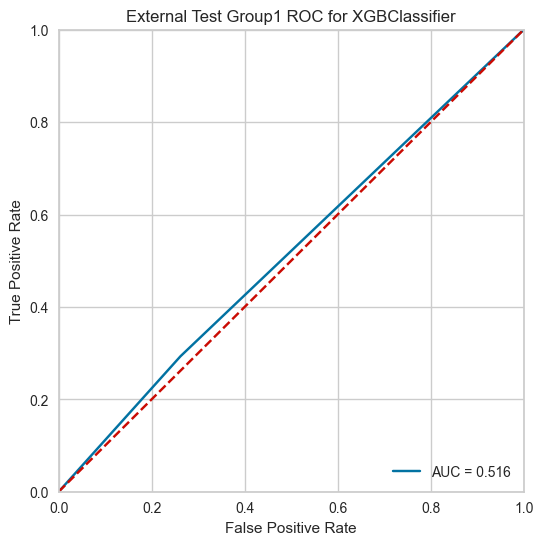

In [108]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [109]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[31 11]
 [41 17]]
Normalized confusion matrix
[[0.74 0.26]
 [0.71 0.29]]


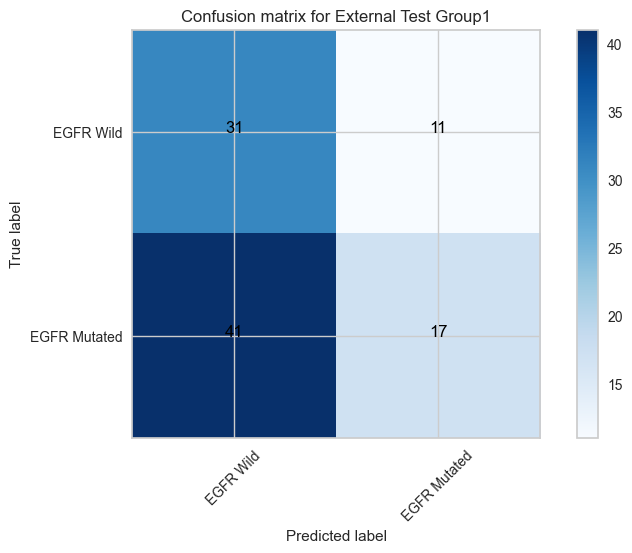

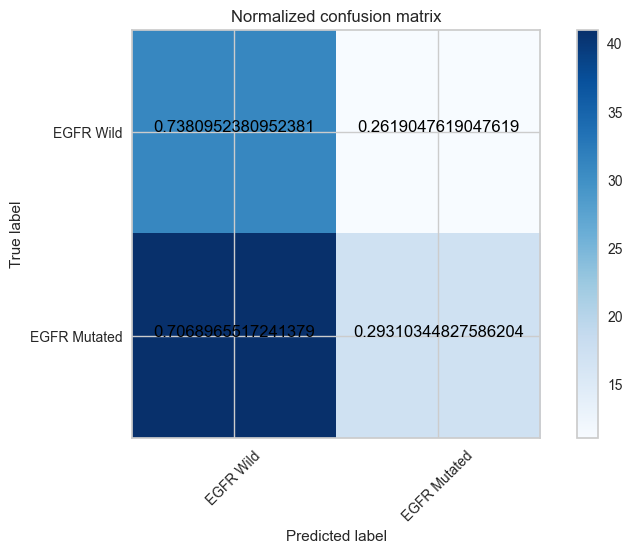

In [110]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [111]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-NB-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.42      1.00      0.59        42
EGFR Mutated       0.00      0.00      0.00        58

    accuracy                           0.42       100
   macro avg       0.21      0.50      0.30       100
weighted avg       0.18      0.42      0.25       100

precision 0.0 accuracy 0.42 recall 0.0 auc 0.5


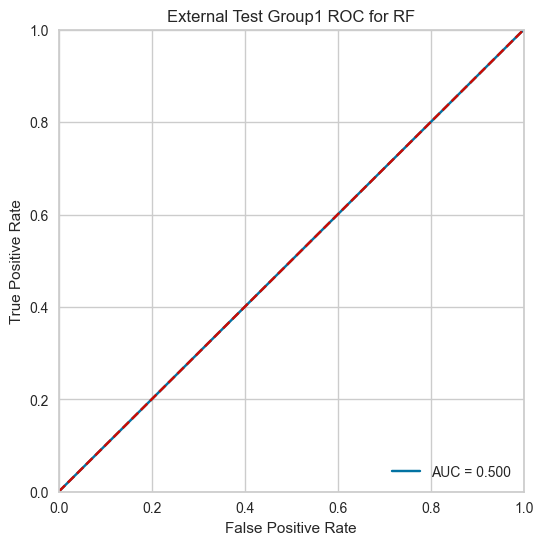

In [112]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[42  0]
 [58  0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


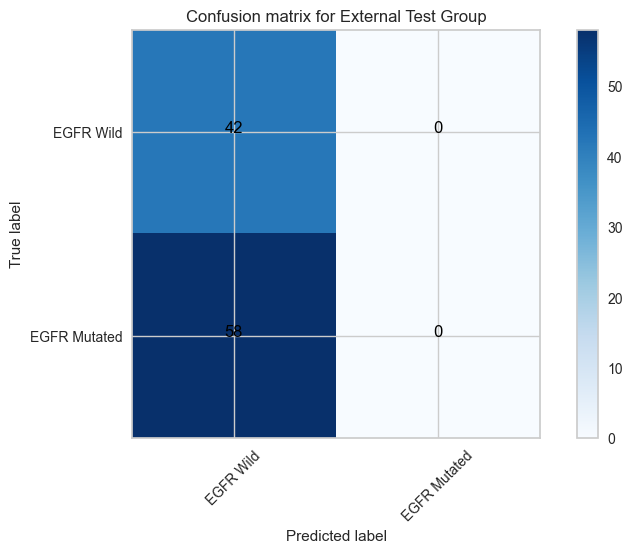

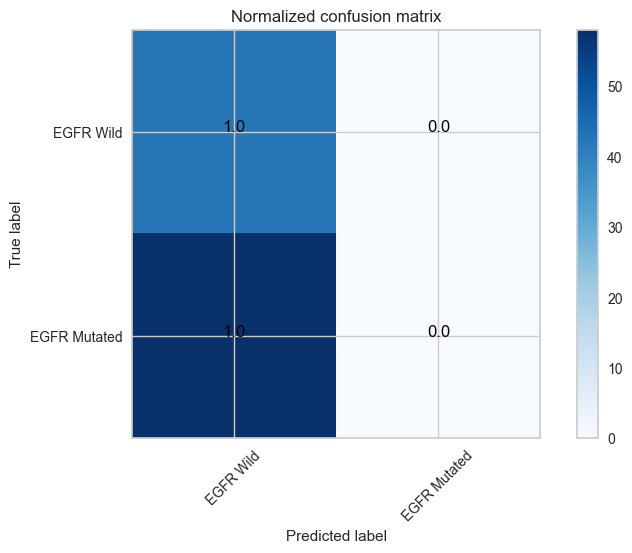

In [113]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [114]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-NB-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.42      1.00      0.59        42
EGFR Mutated       0.00      0.00      0.00        58

    accuracy                           0.42       100
   macro avg       0.21      0.50      0.30       100
weighted avg       0.18      0.42      0.25       100

precision 0.0 accuracy 0.42 recall 0.0 auc 0.5


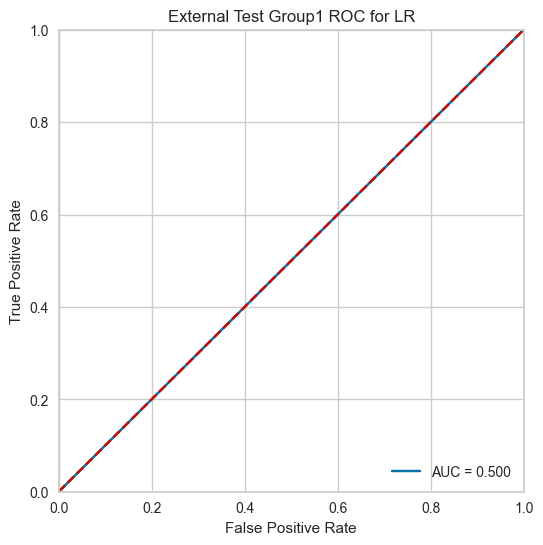

In [115]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[42  0]
 [58  0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


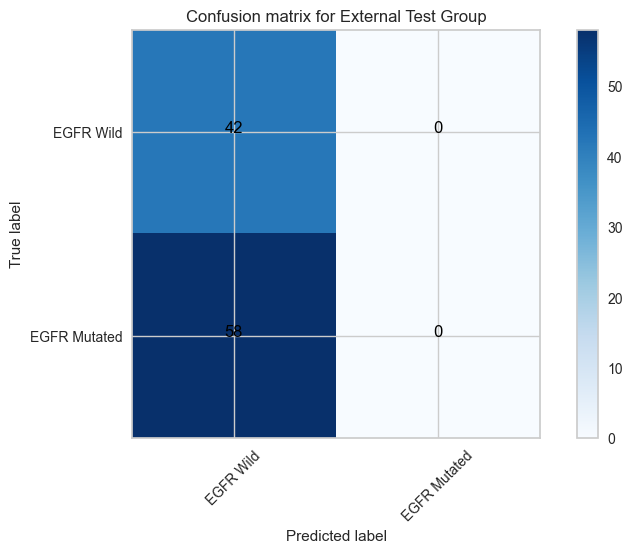

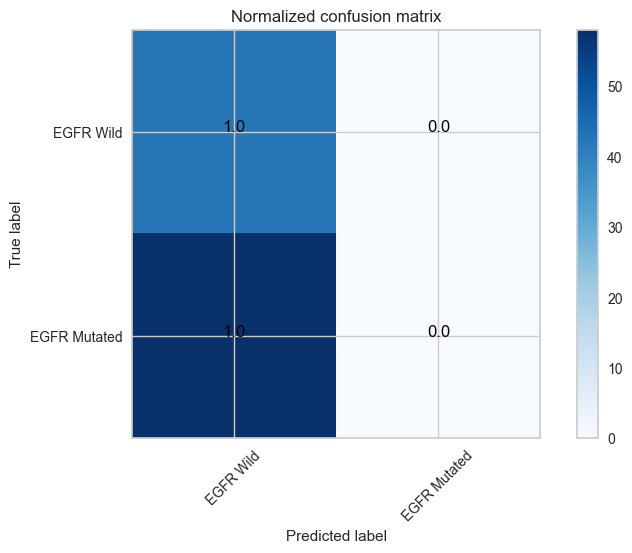

In [116]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [117]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-GBDT-NB-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.45      0.60      0.51        42
EGFR Mutated       0.61      0.47      0.53        58

    accuracy                           0.52       100
   macro avg       0.53      0.53      0.52       100
weighted avg       0.54      0.52      0.52       100

precision 0.6136363636363636 accuracy 0.52 recall 0.46551724137931033 auc 0.5303776683087027


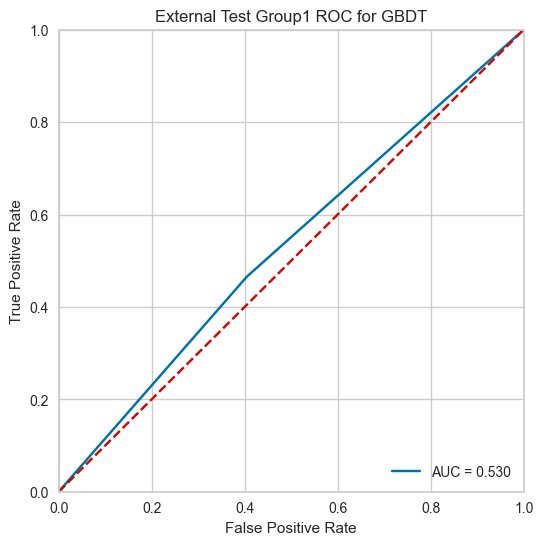

In [118]:
##GBDT 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for GBDT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[25 17]
 [31 27]]
Normalized confusion matrix
[[0.6  0.4 ]
 [0.53 0.47]]


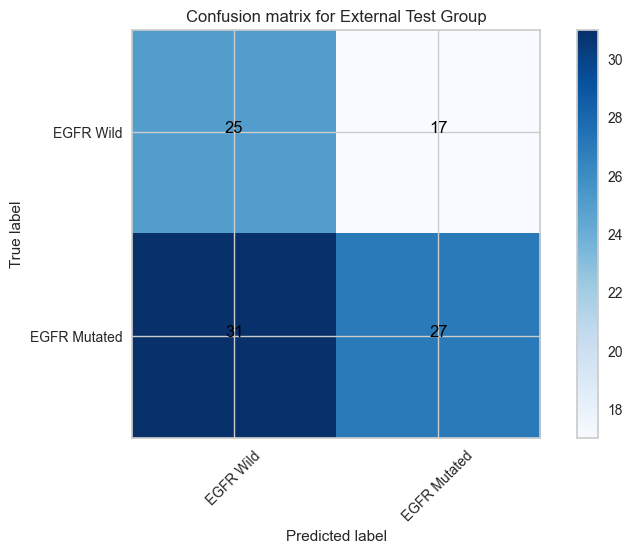

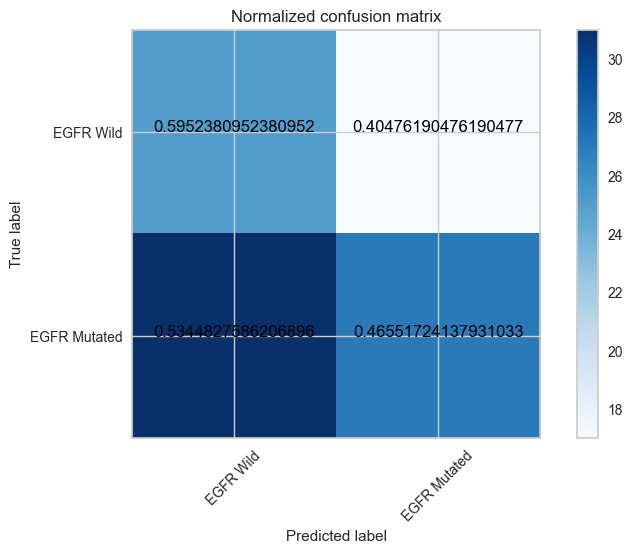

In [119]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [120]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-NB-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.43      0.69      0.53        42
EGFR Mutated       0.61      0.34      0.44        58

    accuracy                           0.49       100
   macro avg       0.52      0.52      0.49       100
weighted avg       0.53      0.49      0.48       100

precision 0.6060606060606061 accuracy 0.49 recall 0.3448275862068966 auc 0.5176518883415435


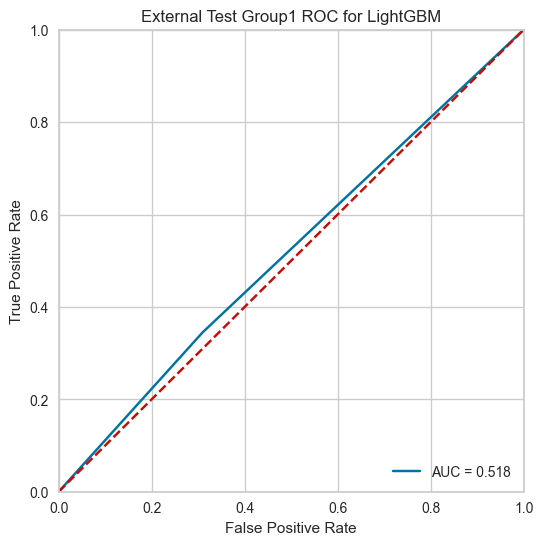

In [121]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[29 13]
 [38 20]]
Normalized confusion matrix
[[0.69 0.31]
 [0.66 0.34]]


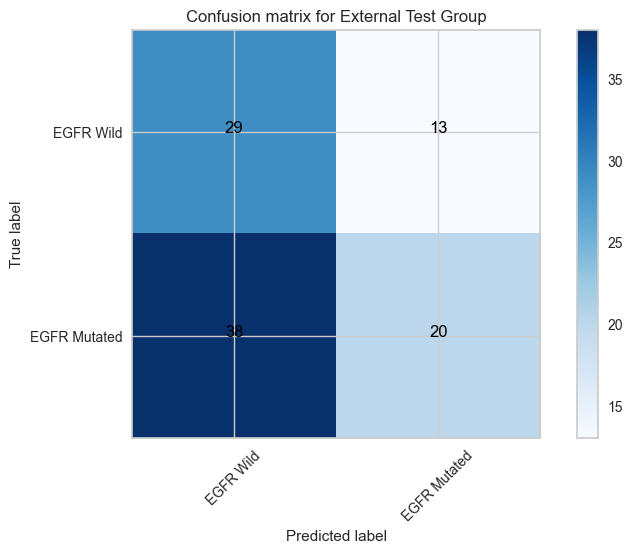

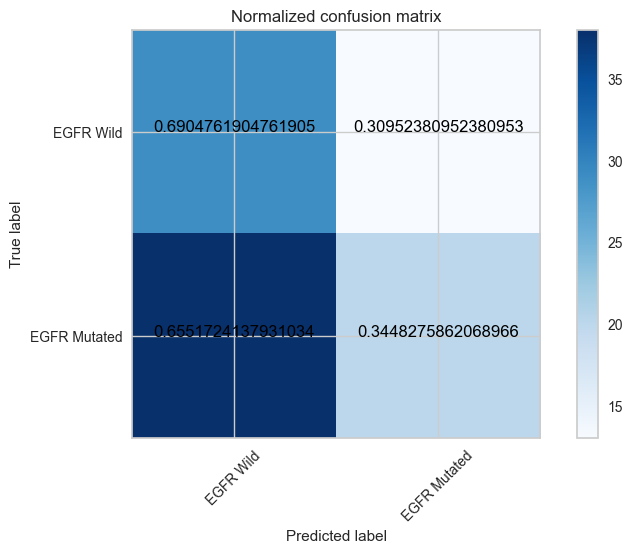

In [122]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()